In [1]:

# CELL 1: INSTALLATION & SETUP

print(" Installing required packages")

# Install Gymnasium with Atari support
!pip install -q gymnasium[atari]
!pip install -q gymnasium[accept-rom-license]
!pip install -q ale-py
!apt-get install -y swig > /dev/null 2>&1

# Install other dependencies
!pip install -q opencv-python
!pip install -q imageio
!pip install -q imageio-ffmpeg

print("\n All packages installed successfully!")

 Installing required packages

 All packages installed successfully!


In [2]:

# CELL 2: IMPORT LIBRARIES & VERIFY GPU

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import random
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import cv2
import time
from IPython.display import clear_output

# Set random seeds for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

print("✅ All libraries imported successfully!\n")

# Check GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🖥️  Device: {device}")

if torch.cuda.is_available():
    print(f"✅ GPU Name: {torch.cuda.get_device_name(0)}")
    print(f"✅ GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
else:
    print("  WARNING: No GPU detected! Training will be VERY slow.")

✅ All libraries imported successfully!

🖥️  Device: cuda
✅ GPU Name: Tesla T4
✅ GPU Memory: 15.83 GB


In [3]:

# CELL 3: Install ALE ROMs

print(" Installing Atari ROMs")
!pip install -q "gymnasium[atari, accept-rom-license]"
!pip install -q autorom[accept-rom-license]
!AutoROM --accept-license

print("✅ ROMs installed! Now testing environment")

 Installing Atari ROMs
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 28.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
AutoROM will download the Atari 2600 ROMs.
They will be installed to:
	/usr/local/lib/python3.12/dist-packages/AutoROM/roms

Existing ROMs will be overwritten.
✅ ROMs installed! Now testing environment


In [4]:

# COMPLETE ROM REINSTALL

print("🔧 Completely reinstalling Atari environment...\n")

# Uninstall everything
!pip uninstall -y gymnasium ale-py autorom -q

# Reinstall with proper dependencies
!pip install -q gymnasium[atari]
!pip install -q ale-py==0.8.1

# Install ROMs
!pip install -q autorom[accept-rom-license]
!python -m autorom --accept-license

print("\n✅ Reinstall complete! Testing...")

# Test immediately
import gymnasium as gym

# List what we have
all_envs = gym.envs.registry.keys()
atari_envs = [e for e in all_envs if 'atari' in str(e).lower() or 'ale' in str(e).lower()]
print(f"\nFound {len(atari_envs)} Atari environments")

# Try to import ALE
try:
    from ale_py import ALEInterface
    from ale_py.roms import Seaquest
    print("✅ ALE imported successfully")
    print(f"✅ Seaquest ROM found: {Seaquest}")
except Exception as e:
    print(f"❌ ALE import failed: {e}")

# Now register environments
try:
    from ale_py import gym as ale_gym
    gym.register_envs(ale_gym)
    print("✅ ALE environments registered")
except:
    pass

# Try creating environment one more time
try:
    env = gym.make('ALE/Seaquest-v5')
    print("✅ SUCCESS! ALE/Seaquest-v5 works!")
    env.close()
except Exception as e:
    print(f"❌ Still failed: {e}")
    # Try without ALE namespace
    try:
        env = gym.make('Seaquest-v5')
        print("✅ SUCCESS! Seaquest-v5 works!")
        env.close()
    except Exception as e2:
        print(f"❌ Also failed: {e2}")

🔧 Completely reinstalling Atari environment...

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 125.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 952.1/952.1 kB 72.8 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement ale-py==0.8.1 (from versions: 0.9.0, 0.9.1, 0.10.0, 0.10.1, 0.10.2, 0.11.0, 0.11.1, 0.11.2)
ERROR: No matching distribution found for ale-py==0.8.1
/usr/bin/python3: No module named autorom

✅ Reinstall complete! Testing...

Found 0 Atari environments
❌ ALE import failed: cannot import name 'Seaquest' from 'ale_py.roms' (/usr/local/lib/python3.12/dist-packages/ale_py/roms/__init__.py)
✅ SUCCESS! ALE/Seaquest-v5 works!


In [5]:

# CELL 5: FINAL ENVIRONMENT VERIFICATION

import gymnasium as gym
import numpy as np

print("🎮 Final verification of Seaquest environment\n")

# Create environment
env = gym.make('ALE/Seaquest-v5')

print(f"✅ Environment: ALE/Seaquest-v5")
print(f"📊 Observation shape: {env.observation_space.shape}")
print(f"🎮 Number of actions: {env.action_space.n}")

# Get action meanings
try:
    actions = env.unwrapped.get_action_meanings()
    print(f"\n🎯 Available actions:")
    for i, action in enumerate(actions):
        print(f"   {i}: {action}")
except:
    print(f"\n🎯 {env.action_space.n} actions available")

# Quick test run
print("\n🧪 Running quick test (100 random steps)...")
obs, info = env.reset()
total_reward = 0
steps = 0

for i in range(100):
    action = env.action_space.sample()  # Random action
    obs, reward, terminated, truncated, info = env.step(action)
    total_reward += reward
    steps = i + 1
    if terminated or truncated:
        break

print(f"\n✅ TEST COMPLETE!")
print(f"   Steps taken: {steps}")
print(f"   Total reward: {total_reward}")
print(f"   Final frame shape: {obs.shape}")
print(f"   Frame dtype: {obs.dtype}")

env.close()

print("\n" + "="*60)
print("🚀 ENVIRONMENT IS READY FOR DQN TRAINING!")
print("="*60)

🎮 Final verification of Seaquest environment

✅ Environment: ALE/Seaquest-v5
📊 Observation shape: (210, 160, 3)
🎮 Number of actions: 18

🎯 Available actions:
   0: NOOP
   1: FIRE
   2: UP
   3: RIGHT
   4: LEFT
   5: DOWN
   6: UPRIGHT
   7: UPLEFT
   8: DOWNRIGHT
   9: DOWNLEFT
   10: UPFIRE
   11: RIGHTFIRE
   12: LEFTFIRE
   13: DOWNFIRE
   14: UPRIGHTFIRE
   15: UPLEFTFIRE
   16: DOWNRIGHTFIRE
   17: DOWNLEFTFIRE

🧪 Running quick test (100 random steps)...

✅ TEST COMPLETE!
   Steps taken: 100
   Total reward: 0.0
   Final frame shape: (210, 160, 3)
   Frame dtype: uint8

🚀 ENVIRONMENT IS READY FOR DQN TRAINING!


In [6]:

# CELL 6: PREPROCESSING - Frame Processing & Stacking


import cv2

class PreprocessFrame(gym.ObservationWrapper):
    """
    Preprocesses Atari frames:
    - Converts RGB to grayscale (reduces data from 3 channels to 1)
    - Resizes from 210x160 to 84x84 (standard for Atari DQN)
    - Normalizes pixel values to [0, 1]
    """
    def __init__(self, env):
        super(PreprocessFrame, self).__init__(env)
        self.observation_space = gym.spaces.Box(
            low=0, high=1, shape=(84, 84), dtype=np.float32
        )

    def observation(self, frame):
        # Convert RGB to grayscale
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        # Resize to 84x84
        frame = cv2.resize(frame, (84, 84), interpolation=cv2.INTER_AREA)
        # Normalize to [0, 1]
        frame = frame / 255.0
        return frame.astype(np.float32)


class FrameStack(gym.Wrapper):
    """
    Stacks the last n frames together.

    Why? A single frame doesn't show movement/velocity.
    By stacking 4 frames, the agent can understand:
    - Which direction things are moving
    - How fast they're moving
    - Temporal patterns
    """
    def __init__(self, env, n_frames=4):
        super(FrameStack, self).__init__(env)
        self.n_frames = n_frames
        self.frames = deque(maxlen=n_frames)
        shape = env.observation_space.shape
        self.observation_space = gym.spaces.Box(
            low=0, high=1,
            shape=(n_frames, *shape),
            dtype=np.float32
        )

    def reset(self, **kwargs):
        obs, info = self.env.reset(**kwargs)
        # Fill the deque with the first frame repeated
        for _ in range(self.n_frames):
            self.frames.append(obs)
        return self._get_obs(), info

    def step(self, action):
        obs, reward, terminated, truncated, info = self.env.step(action)
        self.frames.append(obs)
        return self._get_obs(), reward, terminated, truncated, info

    def _get_obs(self):
        return np.array(self.frames, dtype=np.float32)


def make_seaquest_env():
    """
    Creates the Seaquest environment with all preprocessing.

    Pipeline:
    1. Create base environment
    2. Apply frame preprocessing (grayscale, resize, normalize)
    3. Apply frame stacking (4 frames)

    Returns environment ready for DQN training.
    """
    env = gym.make('ALE/Seaquest-v5')
    env = PreprocessFrame(env)
    env = FrameStack(env, n_frames=4)
    return env


# Test the preprocessing
print("🧪 Testing preprocessing pipeline...\n")
test_env = make_seaquest_env()

obs, info = test_env.reset()
print(f"✅ Preprocessed observation shape: {obs.shape}")
print(f"   Expected: (4, 84, 84) - 4 stacked grayscale 84x84 frames")
print(f"✅ Data type: {obs.dtype}")
print(f"✅ Value range: [{obs.min():.2f}, {obs.max():.2f}]")

# Take a few steps
for i in range(5):
    action = test_env.action_space.sample()
    obs, reward, terminated, truncated, info = test_env.step(action)

print(f"\n✅ After 5 steps, shape still: {obs.shape}")
test_env.close()

print("\n" + "="*60)
print("🎉 PREPROCESSING PIPELINE READY!")
print("="*60)


🧪 Testing preprocessing pipeline...

✅ Preprocessed observation shape: (4, 84, 84)
   Expected: (4, 84, 84) - 4 stacked grayscale 84x84 frames
✅ Data type: float32
✅ Value range: [0.00, 0.76]

✅ After 5 steps, shape still: (4, 84, 84)

🎉 PREPROCESSING PIPELINE READY!


In [7]:

# CELL 7: DQN NEURAL NETWORK ARCHITECTURE


class DQN(nn.Module):
    """
    Deep Q-Network using Convolutional Neural Network.

    Architecture (based on Mnih et al. 2015 Nature paper):
    - 3 Convolutional layers to extract spatial features from frames
    - 2 Fully connected layers to estimate Q-values

    Input: 4 stacked frames (4, 84, 84)
    Output: Q-value for each of the 18 actions
    """

    def __init__(self, n_actions=18):
        super(DQN, self).__init__()

        # Convolutional layers
        # Conv1: 4 input channels (stacked frames) -> 32 feature maps
        self.conv1 = nn.Conv2d(4, 32, kernel_size=8, stride=4)
        # After conv1: (84-8)/4 + 1 = 20x20

        # Conv2: 32 -> 64 feature maps
        self.conv2 = nn.Conv2d(32, 64, kernel_size=4, stride=2)
        # After conv2: (20-4)/2 + 1 = 9x9

        # Conv3: 64 -> 64 feature maps
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, stride=1)
        # After conv3: (9-3)/1 + 1 = 7x7

        # Calculate flattened size: 64 feature maps * 7 * 7 = 3136
        conv_output_size = 64 * 7 * 7

        # Fully connected layers
        self.fc1 = nn.Linear(conv_output_size, 512)
        self.fc2 = nn.Linear(512, n_actions)

    def forward(self, x):
        """
        Forward pass through the network.

        Args:
            x: Input tensor of shape (batch_size, 4, 84, 84)

        Returns:
            Q-values for each action, shape (batch_size, n_actions)
        """
        # Apply convolutional layers with ReLU activation
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))

        # Flatten for fully connected layers
        x = x.view(x.size(0), -1)

        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = self.fc2(x)  # No activation on output (raw Q-values)

        return x


# Test the network
print("🧠 Testing DQN Neural Network...\n")

# Create network
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
test_dqn = DQN(n_actions=18).to(device)

# Create dummy input (batch of 2 frames)
dummy_input = torch.randn(2, 4, 84, 84).to(device)

# Forward pass
with torch.no_grad():
    output = test_dqn(dummy_input)

print(f"✅ Network created successfully!")
print(f"✅ Device: {device}")
print(f"✅ Input shape: {dummy_input.shape}")
print(f"✅ Output shape: {output.shape}")
print(f"   Expected: (2, 18) - 18 Q-values for each of 2 samples")

# Count parameters
total_params = sum(p.numel() for p in test_dqn.parameters())
trainable_params = sum(p.numel() for p in test_dqn.parameters() if p.requires_grad)

print(f"\n📊 Network Statistics:")
print(f"   Total parameters: {total_params:,}")
print(f"   Trainable parameters: {trainable_params:,}")
print(f"   Network size: ~{total_params * 4 / 1024 / 1024:.2f} MB")

print("\n" + "="*60)
print("🎉 DQN NETWORK READY!")
print("="*60)


🧠 Testing DQN Neural Network...

✅ Network created successfully!
✅ Device: cuda
✅ Input shape: torch.Size([2, 4, 84, 84])
✅ Output shape: torch.Size([2, 18])
   Expected: (2, 18) - 18 Q-values for each of 2 samples

📊 Network Statistics:
   Total parameters: 1,693,362
   Trainable parameters: 1,693,362
   Network size: ~6.46 MB

🎉 DQN NETWORK READY!


In [8]:

# CELL 8: REPLAY BUFFER (Experience Memory)

from collections import deque
import numpy as np
import random

class ReplayBuffer:


    def __init__(self, capacity=100000):
        """
        Args:
            capacity: Maximum number of experiences to store
        """
        self.buffer = deque(maxlen=capacity)

    def push(self, state, action, reward, next_state, done):
        """
        Store a transition in the buffer.

        Args:
            state: Current state (4, 84, 84)
            action: Action taken (int)
            reward: Reward received (float)
            next_state: Next state (4, 84, 84)
            done: Episode terminated (bool)
        """
        self.buffer.append((state, action, reward, next_state, done))

    def sample(self, batch_size):
        """
        Sample a random batch of transitions.

        Args:
            batch_size: Number of transitions to sample

        Returns:
            Tuple of batched (states, actions, rewards, next_states, dones)
        """
        batch = random.sample(self.buffer, batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)

        return (
            np.array(states),
            np.array(actions),
            np.array(rewards, dtype=np.float32),
            np.array(next_states),
            np.array(dones, dtype=np.float32)
        )

    def __len__(self):
        """Return current size of buffer"""
        return len(self.buffer)


# Test the replay buffer
print("💾 Testing Replay Buffer...\n")

# Create buffer
test_buffer = ReplayBuffer(capacity=10000)

print(f"✅ Buffer created with capacity: 10,000")
print(f"✅ Current size: {len(test_buffer)}")

# Add some dummy experiences
for i in range(100):
    state = np.random.rand(4, 84, 84).astype(np.float32)
    action = np.random.randint(0, 18)
    reward = np.random.rand()
    next_state = np.random.rand(4, 84, 84).astype(np.float32)
    done = np.random.rand() > 0.9  # 10% chance of episode ending

    test_buffer.push(state, action, reward, next_state, done)

print(f"✅ Added 100 experiences")
print(f"✅ Current buffer size: {len(test_buffer)}")

# Sample a batch
batch_size = 32
states, actions, rewards, next_states, dones = test_buffer.sample(batch_size)

print(f"\n📦 Sampled batch of {batch_size} experiences:")
print(f"   States shape: {states.shape}")
print(f"   Actions shape: {actions.shape}")
print(f"   Rewards shape: {rewards.shape}")
print(f"   Next states shape: {next_states.shape}")
print(f"   Dones shape: {dones.shape}")

# Check memory usage
import sys
buffer_size_mb = sys.getsizeof(test_buffer.buffer) / 1024 / 1024
print(f"\n📊 Buffer memory usage: ~{buffer_size_mb:.2f} MB (with 100 experiences)")
print(f"   Estimated at full capacity (100k): ~{buffer_size_mb * 1000:.0f} MB")

print("\n" + "="*60)
print("🎉 REPLAY BUFFER READY!")
print("="*60)


💾 Testing Replay Buffer...

✅ Buffer created with capacity: 10,000
✅ Current size: 0
✅ Added 100 experiences
✅ Current buffer size: 100

📦 Sampled batch of 32 experiences:
   States shape: (32, 4, 84, 84)
   Actions shape: (32,)
   Rewards shape: (32,)
   Next states shape: (32, 4, 84, 84)
   Dones shape: (32,)

📊 Buffer memory usage: ~0.00 MB (with 100 experiences)
   Estimated at full capacity (100k): ~2 MB

🎉 REPLAY BUFFER READY!


In [9]:

# CELL 9: DQN AGENT - The Complete Learning System


import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class DQNAgent:
    """
    Deep Q-Learning Agent with:
    - Experience replay
    - Target network (for stability)
    - Epsilon-greedy exploration

    This is the "brain" that learns to play Seaquest!
    """

    def __init__(
        self,
        n_actions=18,
        learning_rate=0.00025,
        gamma=0.99,
        epsilon_start=1.0,
        epsilon_end=0.01,
        epsilon_decay=0.995,
        batch_size=32,
        target_update_freq=1000,
        memory_capacity=100000
    ):
        """
        Initialize the DQN Agent.

        Args:
            n_actions: Number of possible actions (18 for Seaquest)
            learning_rate: Learning rate (alpha) for optimizer
            gamma: Discount factor for future rewards
            epsilon_start: Starting exploration rate
            epsilon_end: Minimum exploration rate
            epsilon_decay: How fast epsilon decays
            batch_size: Number of experiences to sample per training step
            target_update_freq: How often to update target network
            memory_capacity: Size of replay buffer
        """
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"🖥️ Agent using device: {self.device}")

        # Hyperparameters
        self.n_actions = n_actions
        self.gamma = gamma
        self.epsilon = epsilon_start
        self.epsilon_end = epsilon_end
        self.epsilon_decay = epsilon_decay
        self.batch_size = batch_size
        self.target_update_freq = target_update_freq

        # Networks
        self.policy_net = DQN(n_actions).to(self.device)  # The network being trained
        self.target_net = DQN(n_actions).to(self.device)  # Stable target for Q-value calculation
        self.target_net.load_state_dict(self.policy_net.state_dict())
        self.target_net.eval()  # Target network is not trained

        # Optimizer
        self.optimizer = optim.Adam(self.policy_net.parameters(), lr=learning_rate)

        # Replay buffer
        self.memory = ReplayBuffer(capacity=memory_capacity)

        # Training metrics
        self.steps_done = 0
        self.episodes_done = 0

    def select_action(self, state, training=True):
        """
        Select action using epsilon-greedy policy.

        Args:
            state: Current game state (4, 84, 84)
            training: If True, use epsilon-greedy. If False, always exploit.

        Returns:
            action: Integer action to take
        """
        # Exploration: random action
        if training and np.random.random() < self.epsilon:
            return np.random.randint(0, self.n_actions)

        # Exploitation: best action according to policy network
        with torch.no_grad():
            state_tensor = torch.FloatTensor(state).unsqueeze(0).to(self.device)
            q_values = self.policy_net(state_tensor)
            return q_values.argmax().item()

    def train_step(self):
        """
        Perform one training step using experience replay.

        This implements the Bellman equation:
        Q(s,a) = r + γ * max_a' Q_target(s',a')

        Returns:
            loss: Training loss (None if buffer too small)
        """
        # Need enough experiences to sample a batch
        if len(self.memory) < self.batch_size:
            return None

        # Sample batch from replay buffer
        states, actions, rewards, next_states, dones = self.memory.sample(self.batch_size)

        # Convert to tensors
        states = torch.FloatTensor(states).to(self.device)
        actions = torch.LongTensor(actions).to(self.device)
        rewards = torch.FloatTensor(rewards).to(self.device)
        next_states = torch.FloatTensor(next_states).to(self.device)
        dones = torch.FloatTensor(dones).to(self.device)

        # Current Q-values: Q(s,a) from policy network
        current_q_values = self.policy_net(states).gather(1, actions.unsqueeze(1)).squeeze()

        # Next Q-values: max_a' Q_target(s',a') from target network
        with torch.no_grad():
            next_q_values = self.target_net(next_states).max(1)[0]
            # Target: r + γ * max_a' Q(s',a') * (1 - done)
            target_q_values = rewards + self.gamma * next_q_values * (1 - dones)

        # Compute loss (Mean Squared Error)
        loss = F.mse_loss(current_q_values, target_q_values)

        # Optimize the policy network
        self.optimizer.zero_grad()
        loss.backward()
        # Clip gradients to prevent exploding gradients
        torch.nn.utils.clip_grad_norm_(self.policy_net.parameters(), 10)
        self.optimizer.step()

        return loss.item()

    def update_target_network(self):

        self.target_net.load_state_dict(self.policy_net.state_dict())

    def decay_epsilon(self):

        self.epsilon = max(self.epsilon_end, self.epsilon * self.epsilon_decay)

    def save(self, filepath):
        """Save agent state"""
        torch.save({
            'policy_net_state_dict': self.policy_net.state_dict(),
            'target_net_state_dict': self.target_net.state_dict(),
            'optimizer_state_dict': self.optimizer.state_dict(),
            'epsilon': self.epsilon,
            'steps_done': self.steps_done,
            'episodes_done': self.episodes_done,
        }, filepath)

    def load(self, filepath):
        """Load agent state"""
        checkpoint = torch.load(filepath)
        self.policy_net.load_state_dict(checkpoint['policy_net_state_dict'])
        self.target_net.load_state_dict(checkpoint['target_net_state_dict'])
        self.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        self.epsilon = checkpoint['epsilon']
        self.steps_done = checkpoint['steps_done']
        self.episodes_done = checkpoint['episodes_done']


# Test the agent
print("🤖 Testing DQN Agent...\n")

# Create agent
test_agent = DQNAgent(
    n_actions=18,
    learning_rate=0.00025,
    gamma=0.99,
    epsilon_start=1.0,
    batch_size=32
)

print(f"✅ Agent created successfully!")
print(f"✅ Policy network parameters: {sum(p.numel() for p in test_agent.policy_net.parameters()):,}")
print(f"✅ Replay buffer capacity: {test_agent.memory.buffer.maxlen:,}")
print(f"✅ Initial epsilon: {test_agent.epsilon}")
print(f"✅ Gamma (discount factor): {test_agent.gamma}")

# Test action selection
dummy_state = np.random.rand(4, 84, 84).astype(np.float32)
action = test_agent.select_action(dummy_state)
print(f"\n✅ Action selection works! Selected action: {action}")

# Add some experiences and test training
print(f"\n🧪 Testing training loop...")
for i in range(100):
    state = np.random.rand(4, 84, 84).astype(np.float32)
    action = np.random.randint(0, 18)
    reward = np.random.rand()
    next_state = np.random.rand(4, 84, 84).astype(np.float32)
    done = False
    test_agent.memory.push(state, action, reward, next_state, done)

# Train a few steps
losses = []
for i in range(10):
    loss = test_agent.train_step()
    if loss is not None:
        losses.append(loss)

print(f"✅ Training works! Average loss: {np.mean(losses):.4f}")

# Test epsilon decay
initial_epsilon = test_agent.epsilon
test_agent.decay_epsilon()
print(f"✅ Epsilon decay works! {initial_epsilon:.4f} → {test_agent.epsilon:.4f}")

print("\n" + "="*60)
print("🎉 DQN AGENT READY!")
print("="*60)


🤖 Testing DQN Agent...

🖥️ Agent using device: cuda
✅ Agent created successfully!
✅ Policy network parameters: 1,693,362
✅ Replay buffer capacity: 100,000
✅ Initial epsilon: 1.0
✅ Gamma (discount factor): 0.99

✅ Action selection works! Selected action: 1

🧪 Testing training loop...
✅ Training works! Average loss: 0.2203
✅ Epsilon decay works! 1.0000 → 0.9950

🎉 DQN AGENT READY!


In [10]:

# CELL 10: TRAINING LOOP (MEMORY OPTIMIZED VERSION)


import matplotlib.pyplot as plt
import time
import gc
import os

def train_dqn_chunk(
    start_episode=0,
    n_episodes=100,
    checkpoint_path=None,
    learning_rate=0.00025,
    gamma=0.99,
    epsilon_start=1.0,
    epsilon_end=0.01,
    epsilon_decay=0.995,
    batch_size=16,  # ← REDUCED from 32
    target_update_freq=2000,  # ← INCREASED from 1000
    memory_capacity=50000,  # ← REDUCED from 100000
    print_freq=10
) :

    # Clear memory before starting
    gc.collect()
    if torch.cuda.is_available():
        torch.cuda.empty_cache()

    # Create environment
    print(f"🎮 Creating Seaquest environment...")
    env = make_seaquest_env()
    n_actions = env.action_space.n

    # Create or load agent
    if checkpoint_path and os.path.exists(checkpoint_path):
        print(f"📦 Loading checkpoint: {checkpoint_path}")
        checkpoint = torch.load(checkpoint_path)

        agent = DQNAgent(
            n_actions=n_actions,
            learning_rate=learning_rate,
            gamma=gamma,
            epsilon_start=checkpoint['epsilon'],
            epsilon_end=epsilon_end,
            epsilon_decay=epsilon_decay,
            batch_size=batch_size,
            target_update_freq=target_update_freq,
            memory_capacity=memory_capacity  # ← ADDED
        )

        # Load saved state
        agent.policy_net.load_state_dict(checkpoint['policy_net_state_dict'])
        agent.target_net.load_state_dict(checkpoint['target_net_state_dict'])
        agent.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        agent.epsilon = checkpoint['epsilon']
        agent.episodes_done = checkpoint.get('episodes_done', start_episode)
        agent.steps_done = checkpoint.get('steps_done', 0)

        print(f"✅ Resuming from Episode {agent.episodes_done}")
        print(f"   Epsilon: {agent.epsilon:.4f}")
        print(f"   Steps: {agent.steps_done:,}\n")
    else:
        print(f"🤖 Creating new agent...")
        agent = DQNAgent(
            n_actions=n_actions,
            learning_rate=learning_rate,
            gamma=gamma,
            epsilon_start=epsilon_start,
            epsilon_end=epsilon_end,
            epsilon_decay=epsilon_decay,
            batch_size=batch_size,
            target_update_freq=target_update_freq,
            memory_capacity=memory_capacity  # ← ADDED
        )
        agent.episodes_done = start_episode
        print("✅ New agent created\n")

    # Training metrics
    episode_rewards = []
    episode_lengths = []
    episode_losses = []
    epsilons = []
    best_reward = -float('inf')

    end_episode = start_episode + n_episodes

    print("="*70)
    print(f"🚀 TRAINING: Episodes {start_episode + 1} to {end_episode}")
    print("="*70)
    print(f"Learning Rate: {learning_rate}")
    print(f"Gamma: {gamma}")
    print(f"Batch Size: {batch_size}")
    print(f"Memory Capacity: {memory_capacity:,}")
    print(f"Target Update Freq: {target_update_freq:,}")
    print(f"Epsilon: {agent.epsilon:.4f} → {epsilon_end}")
    print(f"Expected time: ~{n_episodes * 0.15:.0f}-{n_episodes * 0.25:.0f} minutes")
    print("="*70 + "\n")

    start_time = time.time()

    # Training loop
    for episode in range(n_episodes):
        current_episode = start_episode + episode + 1

        # Reset environment
        state, _ = env.reset()
        episode_reward = 0
        episode_loss_list = []

        # Run episode
        for step in range(10000):
            action = agent.select_action(state, training=True)
            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated

            agent.memory.push(state, action, reward, next_state, done)

            loss = agent.train_step()
            if loss is not None:
                episode_loss_list.append(loss)

            if agent.steps_done % agent.target_update_freq == 0:
                agent.update_target_network()

            # Clear CUDA cache periodically
            if agent.steps_done % 500 == 0:
                torch.cuda.empty_cache()

            episode_reward += reward
            state = next_state
            agent.steps_done += 1

            if done:
                break

        # Update agent state
        agent.decay_epsilon()
        agent.episodes_done += 1

        # Record metrics
        episode_rewards.append(episode_reward)
        episode_lengths.append(step + 1)
        epsilons.append(agent.epsilon)
        if episode_loss_list:
            episode_losses.append(np.mean(episode_loss_list))

        if episode_reward > best_reward:
            best_reward = episode_reward

        # Print progress
        if (episode + 1) % print_freq == 0:
            avg_reward = np.mean(episode_rewards[-min(len(episode_rewards), 50):])
            avg_length = np.mean(episode_lengths[-min(len(episode_lengths), 50):])
            avg_loss = np.mean(episode_losses[-min(len(episode_losses), 50):]) if episode_losses else 0
            elapsed = time.time() - start_time

            print(f"Ep {current_episode:3d}/{end_episode} | "
                  f"Reward: {avg_reward:5.1f} | "
                  f"Best: {best_reward:4.0f} | "
                  f"Length: {avg_length:4.0f} | "
                  f"Loss: {avg_loss:6.3f} | "
                  f"ε: {agent.epsilon:.3f} | "
                  f"Buf: {len(agent.memory):5d} | "
                  f"Time: {elapsed/60:4.1f}m")

    env.close()

    # Save checkpoint
    save_path = f'seaquest_dqn_episode_{end_episode}.pth'
    print(f"\n💾 Saving checkpoint: {save_path}")
    torch.save({
        'episodes_done': end_episode,
        'policy_net_state_dict': agent.policy_net.state_dict(),
        'target_net_state_dict': agent.target_net.state_dict(),
        'optimizer_state_dict': agent.optimizer.state_dict(),
        'epsilon': agent.epsilon,
        'steps_done': agent.steps_done,
        'best_reward': best_reward,
    }, save_path)

    total_time = time.time() - start_time

    print("\n" + "="*70)
    print(f"✅ COMPLETE: Episodes {start_episode + 1}-{end_episode}")
    print("="*70)
    print(f"⏱️  Time: {total_time/60:.1f} minutes")
    print(f"🏆 Best Reward: {best_reward:.2f}")
    print(f"📈 Avg Reward (last 50): {np.mean(episode_rewards[-50:]):.2f}")
    print(f"📏 Avg Length (last 50): {np.mean(episode_lengths[-50:]):.1f}")
    print(f"🎯 Final Epsilon: {agent.epsilon:.4f}")
    print(f"💾 Saved: {save_path}")
    print("="*70)

    # Clear memory after training
    del agent, env
    gc.collect()
    torch.cuda.empty_cache()

    return {
        'episode_rewards': episode_rewards,
        'episode_lengths': episode_lengths,
        'episode_losses': episode_losses,
        'epsilons': epsilons,
        'best_reward': best_reward
    }



# CHECK IF EPISODE 100 EXISTS


print("📋 SEAQUEST DQN TRAINING - MEMORY OPTIMIZED")
print("="*70)
print("⚙️  Optimized Settings:")
print("   - Batch Size: 16 (reduced for memory)")
print("   - Buffer: 50,000 experiences (reduced)")
print("   - Target Update: Every 2,000 steps")
print("   - CUDA Cache: Cleared every 500 steps")
print("="*70 + "\n")

if os.path.exists('seaquest_dqn_episode_100.pth'):
    print("✅ Episodes 1-100 already completed!")
    print("   Checkpoint found: seaquest_dqn_episode_100.pth")
    print("   Ready to continue training!\n")
else:
    print("⚠️  No Episode 100 checkpoint found!")
    print("   You'll need to train from Episode 1 first.\n")

📋 SEAQUEST DQN TRAINING - MEMORY OPTIMIZED
⚙️  Optimized Settings:
   - Batch Size: 16 (reduced for memory)
   - Buffer: 50,000 experiences (reduced)
   - Target Update: Every 2,000 steps
   - CUDA Cache: Cleared every 500 steps

⚠️  No Episode 100 checkpoint found!
   You'll need to train from Episode 1 first.



In [11]:
# MOUNT GOOGLE DRIVE (PROPER METHOD)


from google.colab import drive

print("📁 Mounting Google Drive...")
print("⚠️  You'll need to click the link and authorize access!\n")

# Mount with force_remount to ensure fresh connection
drive.mount('/content/drive', force_remount=True)

print("\n✅ Google Drive mounted successfully!")

# Create checkpoint directory
import os
import shutil

CHECKPOINT_DIR = '/content/drive/MyDrive/Seaquest_DQN_Checkpoints'
os.makedirs(CHECKPOINT_DIR, exist_ok=True)

print(f"✅ Checkpoint directory created: {CHECKPOINT_DIR}\n")

def backup_to_drive(episode_num):
    """Backup checkpoint to Google Drive"""
    local_file = f'seaquest_dqn_episode_{episode_num}.pth'
    drive_file = os.path.join(CHECKPOINT_DIR, local_file)

    if os.path.exists(local_file):
        shutil.copy(local_file, drive_file)
        print(f"☁️  Episode {episode_num} backed up to Drive!")
        return True
    else:
        print(f"⚠️  {local_file} not found")
        return False

print("✅ Backup function ready!\n")
print("="*70)
print("💡 NOW: Continue with your training cells!")
print("💡 After each cell finishes, run: backup_to_drive(episode_number)")
print("="*70)

📁 Mounting Google Drive...
⚠️  You'll need to click the link and authorize access!

Mounted at /content/drive

✅ Google Drive mounted successfully!
✅ Checkpoint directory created: /content/drive/MyDrive/Seaquest_DQN_Checkpoints

✅ Backup function ready!

💡 NOW: Continue with your training cells!
💡 After each cell finishes, run: backup_to_drive(episode_number)


In [12]:

# CELL 11: TRAIN EPISODES 1-100


import gc

print("\n" + "🚀"*35)
print("TRAINING EPISODES 1-100")
print("🚀"*35 + "\n")


# Clear memory
gc.collect()
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Train Episodes 1-100
results_100 = train_dqn_chunk(
    start_episode=0,  # Start from 0!
    n_episodes=100,
    checkpoint_path=None,  # No checkpoint to load
    learning_rate=0.00025,
    gamma=0.99,
    epsilon_start=1.0,  # Start with full exploration
    epsilon_end=0.01,
    epsilon_decay=0.995,
    batch_size=16,
    target_update_freq=2000,
    memory_capacity=50000,
    print_freq=10
)

print("\n" + "🎉"*35)
print("✅ EPISODES 1-100 COMPLETE!")
print("🎉"*35)
print("\n💾 Checkpoint saved: seaquest_dqn_episode_100.pth")
print("✅ Ready to continue to Episode 200!")
backup_to_drive(100)


🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀
TRAINING EPISODES 1-100
🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀

🎮 Creating Seaquest environment...
🤖 Creating new agent...
🖥️ Agent using device: cuda
✅ New agent created

🚀 TRAINING: Episodes 1 to 100
Learning Rate: 0.00025
Gamma: 0.99
Batch Size: 16
Memory Capacity: 50,000
Target Update Freq: 2,000
Epsilon: 1.0000 → 0.01
Expected time: ~15-25 minutes

Ep  10/100 | Reward: 126.0 | Best:  300 | Length:  629 | Loss:  3.323 | ε: 0.951 | Buf:  6291 | Time:  0.6m
Ep  20/100 | Reward: 104.0 | Best:  300 | Length:  583 | Loss:  3.867 | ε: 0.905 | Buf: 11657 | Time:  1.1m
Ep  30/100 | Reward: 112.0 | Best:  300 | Length:  605 | Loss:  4.023 | ε: 0.860 | Buf: 18159 | Time:  1.8m
Ep  40/100 | Reward: 127.5 | Best:  300 | Length:  636 | Loss:  4.263 | ε: 0.818 | Buf: 25453 | Time:  2.5m
Ep  50/100 | Reward: 139.6 | Best:  320 | Length:  659 | Loss:  4.824 | ε: 0.778 | Buf: 32936 | Time:  3.3m
Ep  60/100 | Reward: 155.2 | Best:  380 | Length:  682 | Loss:  6.088 

True

In [18]:


# CELL 12: EPISODES 101-200


print("\n🚀 Starting Episodes 101-200...\n")

results_200 = train_dqn_chunk(
    start_episode=100,
    n_episodes=100,
    checkpoint_path='seaquest_dqn_episode_100.pth',
    learning_rate=0.00025,
    gamma=0.99,
    epsilon_end=0.01,
    epsilon_decay=0.995,
    print_freq=10
)

print("\n🎊 EPISODES 101-200 COMPLETE!")
backup_to_drive(200)
print("✅ Ready for Episode 300!")


🚀 Starting Episodes 101-200...

🎮 Creating Seaquest environment...
📦 Loading checkpoint: seaquest_dqn_episode_100.pth
🖥️ Agent using device: cuda
✅ Resuming from Episode 100
   Epsilon: 0.6058
   Steps: 71,511

🚀 TRAINING: Episodes 101 to 200
Learning Rate: 0.00025
Gamma: 0.99
Batch Size: 16
Memory Capacity: 50,000
Target Update Freq: 2,000
Epsilon: 0.6058 → 0.01
Expected time: ~15-25 minutes

Ep 110/200 | Reward: 164.0 | Best:  280 | Length:  666 | Loss:  3.459 | ε: 0.576 | Buf:  6662 | Time:  0.7m
Ep 120/200 | Reward: 187.0 | Best:  440 | Length:  714 | Loss:  3.823 | ε: 0.548 | Buf: 14278 | Time:  1.5m
Ep 130/200 | Reward: 192.7 | Best:  440 | Length:  717 | Loss:  4.083 | ε: 0.521 | Buf: 21518 | Time:  2.3m
Ep 140/200 | Reward: 208.5 | Best:  440 | Length:  748 | Loss:  4.232 | ε: 0.496 | Buf: 29910 | Time:  3.2m
Ep 150/200 | Reward: 204.8 | Best:  440 | Length:  747 | Loss:  4.373 | ε: 0.471 | Buf: 37336 | Time:  4.0m
Ep 160/200 | Reward: 218.8 | Best:  500 | Length:  775 | Loss:

In [19]:
# CELL 13: EPISODES 201-300


print("\n🚀 Starting Episodes 201-300...\n")

results_200 = train_dqn_chunk(
    start_episode=200,
    n_episodes=100,
    checkpoint_path='seaquest_dqn_episode_200.pth',
    learning_rate=0.00025,
    gamma=0.99,
    epsilon_end=0.01,
    epsilon_decay=0.995,
    print_freq=10
)

print("\n🎊 EPISODES 201-300 COMPLETE!")
backup_to_drive(300)
print("✅ Ready for Episode 400!")


🚀 Starting Episodes 201-300...

🎮 Creating Seaquest environment...
📦 Loading checkpoint: seaquest_dqn_episode_200.pth
🖥️ Agent using device: cuda
✅ Resuming from Episode 200
   Epsilon: 0.3670
   Steps: 151,306

🚀 TRAINING: Episodes 201 to 300
Learning Rate: 0.00025
Gamma: 0.99
Batch Size: 16
Memory Capacity: 50,000
Target Update Freq: 2,000
Epsilon: 0.3670 → 0.01
Expected time: ~15-25 minutes

Ep 210/300 | Reward: 318.0 | Best:  500 | Length: 1020 | Loss:  3.150 | ε: 0.349 | Buf: 10196 | Time:  1.2m
Ep 220/300 | Reward: 348.0 | Best:  540 | Length: 1077 | Loss:  3.921 | ε: 0.332 | Buf: 21543 | Time:  2.5m
Ep 230/300 | Reward: 350.0 | Best:  620 | Length: 1053 | Loss:  4.521 | ε: 0.316 | Buf: 31584 | Time:  3.7m
Ep 240/300 | Reward: 344.5 | Best:  620 | Length: 1036 | Loss:  4.998 | ε: 0.300 | Buf: 41456 | Time:  4.9m
Ep 250/300 | Reward: 343.6 | Best:  620 | Length: 1039 | Loss:  5.356 | ε: 0.286 | Buf: 50000 | Time:  6.1m
Ep 260/300 | Reward: 362.4 | Best:  620 | Length: 1065 | Loss

In [20]:
# CELL 14: EPISODES 301-400


print("\n🚀 Starting Episodes 301-400 \n")

results_200 = train_dqn_chunk(
    start_episode=300,
    n_episodes=100,
    checkpoint_path='seaquest_dqn_episode_300.pth',
    learning_rate=0.00025,
    gamma=0.99,
    epsilon_end=0.01,
    epsilon_decay=0.995,
    print_freq=10
)

print("\n🎊 EPISODES 301-400 COMPLETE!")
backup_to_drive(400)


🚀 Starting Episodes 301-400 

🎮 Creating Seaquest environment...
📦 Loading checkpoint: seaquest_dqn_episode_300.pth
🖥️ Agent using device: cuda
✅ Resuming from Episode 300
   Epsilon: 0.2223
   Steps: 258,941

🚀 TRAINING: Episodes 301 to 400
Learning Rate: 0.00025
Gamma: 0.99
Batch Size: 16
Memory Capacity: 50,000
Target Update Freq: 2,000
Epsilon: 0.2223 → 0.01
Expected time: ~15-25 minutes

Ep 310/400 | Reward: 384.0 | Best:  780 | Length: 1036 | Loss:  6.387 | ε: 0.211 | Buf: 10357 | Time:  1.1m
Ep 320/400 | Reward: 417.0 | Best:  780 | Length: 1121 | Loss:  7.109 | ε: 0.201 | Buf: 22412 | Time:  2.5m
Ep 330/400 | Reward: 412.7 | Best:  780 | Length: 1104 | Loss:  7.641 | ε: 0.191 | Buf: 33113 | Time:  3.7m
Ep 340/400 | Reward: 412.5 | Best:  780 | Length: 1104 | Loss:  8.034 | ε: 0.182 | Buf: 44180 | Time:  4.9m
Ep 350/400 | Reward: 422.4 | Best:  780 | Length: 1126 | Loss:  8.324 | ε: 0.173 | Buf: 50000 | Time:  6.3m
Ep 360/400 | Reward: 448.8 | Best:  780 | Length: 1175 | Loss: 

True

In [22]:
# CELL 15: EPISODES 401-500


print("\n🚀 Starting Episodes 401-500 \n")

results_200 = train_dqn_chunk(
    start_episode=400,
    n_episodes=100,
    checkpoint_path='seaquest_dqn_episode_400.pth',
    learning_rate=0.00025,
    gamma=0.99,
    epsilon_end=0.01,
    epsilon_decay=0.995,
    print_freq=10
)

print("\n🎊 EPISODES 401-500 COMPLETE!")
backup_to_drive(500)


🚀 Starting Episodes 401-500 

🎮 Creating Seaquest environment...
📦 Loading checkpoint: seaquest_dqn_episode_400.pth
🖥️ Agent using device: cuda
✅ Resuming from Episode 400
   Epsilon: 0.1347
   Steps: 375,759

🚀 TRAINING: Episodes 401 to 500
Learning Rate: 0.00025
Gamma: 0.99
Batch Size: 16
Memory Capacity: 50,000
Target Update Freq: 2,000
Epsilon: 0.1347 → 0.01
Expected time: ~15-25 minutes

Ep 410/500 | Reward: 536.0 | Best:  700 | Length: 1247 | Loss:  7.550 | ε: 0.128 | Buf: 12469 | Time:  1.3m
Ep 420/500 | Reward: 588.0 | Best:  900 | Length: 1329 | Loss:  7.968 | ε: 0.122 | Buf: 26572 | Time:  2.9m
Ep 430/500 | Reward: 588.7 | Best:  900 | Length: 1309 | Loss:  8.431 | ε: 0.116 | Buf: 39271 | Time:  4.3m
Ep 440/500 | Reward: 567.5 | Best:  900 | Length: 1270 | Loss:  8.716 | ε: 0.110 | Buf: 50000 | Time:  5.5m
Ep 450/500 | Reward: 566.0 | Best:  960 | Length: 1271 | Loss:  9.285 | ε: 0.105 | Buf: 50000 | Time:  7.0m
Ep 460/500 | Reward: 580.4 | Best:  960 | Length: 1284 | Loss: 

True

In [23]:
 #CELL 16: EPISODES 501-600


print("\n🚀 Starting Episodes 501-600 \n")

results_200 = train_dqn_chunk(
    start_episode=500,
    n_episodes=100,
    checkpoint_path='seaquest_dqn_episode_500.pth',
    learning_rate=0.00025,
    gamma=0.99,
    epsilon_end=0.01,
    epsilon_decay=0.995,
    print_freq=10
)

print("\n🎊 EPISODES 501-600 COMPLETE!")
backup_to_drive(600)


🚀 Starting Episodes 501-600 

🎮 Creating Seaquest environment...
📦 Loading checkpoint: seaquest_dqn_episode_500.pth
🖥️ Agent using device: cuda
✅ Resuming from Episode 500
   Epsilon: 0.0816
   Steps: 499,209

🚀 TRAINING: Episodes 501 to 600
Learning Rate: 0.00025
Gamma: 0.99
Batch Size: 16
Memory Capacity: 50,000
Target Update Freq: 2,000
Epsilon: 0.0816 → 0.01
Expected time: ~15-25 minutes

Ep 510/600 | Reward: 572.0 | Best: 1080 | Length: 1216 | Loss:  7.363 | ε: 0.078 | Buf: 12160 | Time:  1.3m
Ep 520/600 | Reward: 583.0 | Best: 1120 | Length: 1197 | Loss:  8.716 | ε: 0.074 | Buf: 23944 | Time:  2.6m
Ep 530/600 | Reward: 616.7 | Best: 1120 | Length: 1261 | Loss:  9.295 | ε: 0.070 | Buf: 37840 | Time:  4.2m
Ep 540/600 | Reward: 632.5 | Best: 1200 | Length: 1276 | Loss:  9.740 | ε: 0.067 | Buf: 50000 | Time:  5.6m
Ep 550/600 | Reward: 611.2 | Best: 1200 | Length: 1246 | Loss: 10.245 | ε: 0.063 | Buf: 50000 | Time:  6.9m
Ep 560/600 | Reward: 606.8 | Best: 1200 | Length: 1248 | Loss: 

True

In [24]:
 #CELL 17: EPISODES 601-700


print("\n🚀 Starting Episodes 601-700 \n")

results_200 = train_dqn_chunk(
    start_episode=600,
    n_episodes=100,
    checkpoint_path='seaquest_dqn_episode_600.pth',
    learning_rate=0.00025,
    gamma=0.99,
    epsilon_end=0.01,
    epsilon_decay=0.995,
    print_freq=10
)

print("\n🎊 EPISODES 601-700 COMPLETE!")
backup_to_drive(700)


🚀 Starting Episodes 601-700 

🎮 Creating Seaquest environment...
📦 Loading checkpoint: seaquest_dqn_episode_600.pth
🖥️ Agent using device: cuda
✅ Resuming from Episode 600
   Epsilon: 0.0494
   Steps: 627,210

🚀 TRAINING: Episodes 601 to 700
Learning Rate: 0.00025
Gamma: 0.99
Batch Size: 16
Memory Capacity: 50,000
Target Update Freq: 2,000
Epsilon: 0.0494 → 0.01
Expected time: ~15-25 minutes

Ep 610/700 | Reward: 470.0 | Best:  720 | Length: 1093 | Loss:  9.793 | ε: 0.047 | Buf: 10933 | Time:  1.2m
Ep 620/700 | Reward: 534.0 | Best: 1020 | Length: 1146 | Loss: 10.060 | ε: 0.045 | Buf: 22924 | Time:  2.5m
Ep 630/700 | Reward: 602.0 | Best: 1400 | Length: 1232 | Loss: 10.208 | ε: 0.043 | Buf: 36946 | Time:  4.0m
Ep 640/700 | Reward: 591.5 | Best: 1400 | Length: 1216 | Loss: 10.371 | ε: 0.040 | Buf: 48656 | Time:  5.3m
Ep 650/700 | Reward: 581.6 | Best: 1400 | Length: 1212 | Loss: 10.502 | ε: 0.038 | Buf: 50000 | Time:  6.7m
Ep 660/700 | Reward: 613.2 | Best: 1400 | Length: 1240 | Loss: 

True

In [25]:
#CELL 18: EPISODES 701-800


print("\n🚀 Starting Episodes 701-800 \n")

results_200 = train_dqn_chunk(
    start_episode=700,
    n_episodes=100,
    checkpoint_path='seaquest_dqn_episode_700.pth',
    learning_rate=0.00025,
    gamma=0.99,
    epsilon_end=0.01,
    epsilon_decay=0.995,
    print_freq=10
)

print("\n🎊 EPISODES 701-800 COMPLETE!")
backup_to_drive(800)


🚀 Starting Episodes 701-800 

🎮 Creating Seaquest environment...
📦 Loading checkpoint: seaquest_dqn_episode_700.pth
🖥️ Agent using device: cuda
✅ Resuming from Episode 700
   Epsilon: 0.0299
   Steps: 749,508

🚀 TRAINING: Episodes 701 to 800
Learning Rate: 0.00025
Gamma: 0.99
Batch Size: 16
Memory Capacity: 50,000
Target Update Freq: 2,000
Epsilon: 0.0299 → 0.01
Expected time: ~15-25 minutes

Ep 710/800 | Reward: 332.0 | Best:  440 | Length:  880 | Loss:  8.211 | ε: 0.028 | Buf:  8801 | Time:  1.0m
Ep 720/800 | Reward: 392.0 | Best:  640 | Length:  938 | Loss:  8.488 | ε: 0.027 | Buf: 18766 | Time:  2.1m
Ep 730/800 | Reward: 430.7 | Best:  760 | Length:  992 | Loss:  8.587 | ε: 0.026 | Buf: 29764 | Time:  3.3m
Ep 740/800 | Reward: 434.5 | Best:  760 | Length: 1002 | Loss:  8.687 | ε: 0.024 | Buf: 40075 | Time:  4.4m
Ep 750/800 | Reward: 414.4 | Best:  760 | Length:  971 | Loss:  8.908 | ε: 0.023 | Buf: 48565 | Time:  5.4m
Ep 760/800 | Reward: 458.8 | Best:  920 | Length: 1023 | Loss: 

True

In [27]:
#CELL 19: EPISODES 801-900


print("\n🚀 Starting Episodes 801-900 \n")

results_200 = train_dqn_chunk(
    start_episode=800,
    n_episodes=100,
    checkpoint_path='seaquest_dqn_episode_800.pth',
    learning_rate=0.00025,
    gamma=0.99,
    epsilon_end=0.01,
    epsilon_decay=0.995,
    print_freq=10
)

print("\n🎊 EPISODES 801-900 COMPLETE!")
backup_to_drive(900)


🚀 Starting Episodes 801-900 

🎮 Creating Seaquest environment...
📦 Loading checkpoint: seaquest_dqn_episode_800.pth
🖥️ Agent using device: cuda
✅ Resuming from Episode 800
   Epsilon: 0.0181
   Steps: 860,397

🚀 TRAINING: Episodes 801 to 900
Learning Rate: 0.00025
Gamma: 0.99
Batch Size: 16
Memory Capacity: 50,000
Target Update Freq: 2,000
Epsilon: 0.0181 → 0.01
Expected time: ~15-25 minutes

Ep 810/900 | Reward: 530.0 | Best:  900 | Length: 1178 | Loss:  5.699 | ε: 0.017 | Buf: 11781 | Time:  1.3m
Ep 820/900 | Reward: 594.0 | Best:  920 | Length: 1267 | Loss:  6.707 | ε: 0.016 | Buf: 25347 | Time:  2.8m
Ep 830/900 | Reward: 580.0 | Best:  920 | Length: 1217 | Loss:  7.270 | ε: 0.016 | Buf: 36497 | Time:  4.0m
Ep 840/900 | Reward: 571.0 | Best:  920 | Length: 1189 | Loss:  7.728 | ε: 0.015 | Buf: 47550 | Time:  5.2m
Ep 850/900 | Reward: 567.6 | Best:  920 | Length: 1177 | Loss:  8.187 | ε: 0.014 | Buf: 50000 | Time:  6.4m
Ep 860/900 | Reward: 596.4 | Best: 1260 | Length: 1188 | Loss: 

True

In [28]:
#CELL 20: EPISODES 901-1000


print("\n🚀 Starting Episodes 901-1000 \n")

results_200 = train_dqn_chunk(
    start_episode=900,
    n_episodes=100,
    checkpoint_path='seaquest_dqn_episode_900.pth',
    learning_rate=0.00025,
    gamma=0.99,
    epsilon_end=0.01,
    epsilon_decay=0.995,
    print_freq=10
)

print("\n🎊 EPISODES 901-1000 COMPLETE!")
backup_to_drive(1000)


🚀 Starting Episodes 901-1000 

🎮 Creating Seaquest environment...
📦 Loading checkpoint: seaquest_dqn_episode_900.pth
🖥️ Agent using device: cuda
✅ Resuming from Episode 900
   Epsilon: 0.0110
   Steps: 985,833

🚀 TRAINING: Episodes 901 to 1000
Learning Rate: 0.00025
Gamma: 0.99
Batch Size: 16
Memory Capacity: 50,000
Target Update Freq: 2,000
Epsilon: 0.0110 → 0.01
Expected time: ~15-25 minutes

Ep 910/1000 | Reward: 514.0 | Best:  740 | Length: 1134 | Loss:  6.351 | ε: 0.010 | Buf: 11341 | Time:  1.3m
Ep 920/1000 | Reward: 587.0 | Best:  940 | Length: 1217 | Loss:  6.993 | ε: 0.010 | Buf: 24339 | Time:  2.8m
Ep 930/1000 | Reward: 648.0 | Best: 1200 | Length: 1278 | Loss:  7.346 | ε: 0.010 | Buf: 38338 | Time:  4.3m
Ep 940/1000 | Reward: 664.0 | Best: 1440 | Length: 1292 | Loss:  7.692 | ε: 0.010 | Buf: 50000 | Time:  5.8m
Ep 950/1000 | Reward: 706.0 | Best: 1500 | Length: 1322 | Loss:  8.141 | ε: 0.010 | Buf: 50000 | Time:  7.4m
Ep 960/1000 | Reward: 790.0 | Best: 1500 | Length: 1402 

True

In [ ]:

# VERIFY CHECKPOINTS


import os
import torch

checkpoints = [f for f in os.listdir() if 'seaquest_dqn' in f and f.endswith('.pth')]
print("📦 Available checkpoints:")
for cp in sorted(checkpoints):
    print(f"   ✅ {cp}")

if 'seaquest_dqn_episode_100.pth' in checkpoints:
    print("\n✅ Episode 100 checkpoint found - ready for experiments!")


    checkpoint = torch.load('seaquest_dqn_episode_100.pth')
    print(f"\n📊 Episode 100 Checkpoint Info:")
    print(f"   Episodes: {checkpoint.get('episodes_done', 100)}")
    print(f"   Epsilon: {checkpoint['epsilon']:.4f}")
    print(f"   Steps: {checkpoint.get('steps_done', 'N/A')}")
else:
    print("\n⚠️  Episode 100 checkpoint not found!")
    print("   We'll need to use a different checkpoint.")

if 'seaquest_dqn_episode_1000.pth' in checkpoints:
    print("\n✅ Episode 1000 checkpoint confirmed!")

In [15]:
# Quick Verification
import os
import torch

print("📦 CHECKPOINTS:")
checkpoints = sorted([f for f in os.listdir() if 'seaquest_dqn' in f and f.endswith('.pth')])
for cp in checkpoints:
    print(f"   ✅ {cp}")

print(f"\n📊 BASELINE SUMMARY:")
checkpoint = torch.load('seaquest_dqn_episode_1000.pth')
print(f"   Episodes: {checkpoint.get('episodes_done', 1000)}")
print(f"   Best Reward: {checkpoint.get('best_reward', 'N/A')}")
print(f"   Epsilon: {checkpoint['epsilon']:.4f}")

print(f"\n🧪 READY FOR EXPERIMENTS:")
if os.path.exists('seaquest_dqn_episode_100.pth'):
    print(f"   ✅ Episode 100 checkpoint found!")
else:
    print(f"   ❌ Episode 100 missing!")

📦 CHECKPOINTS:
   ✅ seaquest_dqn_episode_100.pth
   ✅ seaquest_dqn_episode_1000.pth
   ✅ seaquest_dqn_episode_200.pth
   ✅ seaquest_dqn_episode_300.pth
   ✅ seaquest_dqn_episode_400.pth
   ✅ seaquest_dqn_episode_500.pth
   ✅ seaquest_dqn_episode_600.pth
   ✅ seaquest_dqn_episode_700.pth
   ✅ seaquest_dqn_episode_800.pth
   ✅ seaquest_dqn_episode_900.pth

📊 BASELINE SUMMARY:
   Episodes: 1000
   Best Reward: 1520.0
   Epsilon: 0.0100

🧪 READY FOR EXPERIMENTS:
   ✅ Episode 100 checkpoint found!


In [30]:

# EXPERIMENT 1: HIGHER LEARNING RATE (Alpha = 0.0005)


print("\n" + "🧪"*35)
print("EXPERIMENT 1: HIGHER LEARNING RATE")
print("🧪"*35)
print("\nBaseline Alpha: 0.00025")
print("Experiment Alpha: 0.0005 (2x higher)")
print("="*70 + "\n")

# Load Episode 100 checkpoint
checkpoint = torch.load('seaquest_dqn_episode_100.pth')
print(f"✅ Loaded Episode 100 checkpoint (ε={checkpoint['epsilon']:.4f})\n")

# Create environment
env_exp1 = make_seaquest_env()

# Create agent with HIGHER learning rate
agent_exp1 = DQNAgent(
    n_actions=18,
    learning_rate=0.0005,  # ← 2X HIGHER!
    gamma=0.99,
    epsilon_start=checkpoint['epsilon'],
    epsilon_end=0.01,
    epsilon_decay=0.995,
    batch_size=16,
    target_update_freq=2000,
    memory_capacity=50000
)

# Load Episode 100 weights
agent_exp1.policy_net.load_state_dict(checkpoint['policy_net_state_dict'])
agent_exp1.target_net.load_state_dict(checkpoint['target_net_state_dict'])
agent_exp1.epsilon = checkpoint['epsilon']

print("🚀 Training 100 episodes (101-200) with HIGHER alpha...\n")

# Train
exp1_rewards = []
exp1_lengths = []
best_exp1 = -float('inf')

import time
start = time.time()

for ep in range(100):
    state, _ = env_exp1.reset()
    ep_reward = 0
    steps = 0

    for step in range(10000):
        action = agent_exp1.select_action(state, training=True)
        next_state, reward, terminated, truncated, info = env_exp1.step(action)
        done = terminated or truncated

        agent_exp1.memory.push(state, action, reward, next_state, done)
        agent_exp1.train_step()

        if agent_exp1.steps_done % 2000 == 0:
            agent_exp1.update_target_network()
        if agent_exp1.steps_done % 500 == 0:
            torch.cuda.empty_cache()

        ep_reward += reward
        state = next_state
        agent_exp1.steps_done += 1
        steps += 1

        if done:
            break

    agent_exp1.decay_epsilon()
    exp1_rewards.append(ep_reward)
    exp1_lengths.append(steps)
    if ep_reward > best_exp1:
        best_exp1 = ep_reward

    if (ep + 1) % 10 == 0:
        avg = np.mean(exp1_rewards[-10:])
        print(f"Ep {100+ep+1} | Reward: {avg:.1f} | Best: {best_exp1:.0f} | ε: {agent_exp1.epsilon:.3f}")

env_exp1.close()

print("\n" + "="*70)
print("✅ EXPERIMENT 1 COMPLETE!")
print("="*70)
print(f"⏱️  Time: {(time.time()-start)/60:.1f} min")
print(f"🏆 Best Reward: {best_exp1:.2f}")
print(f"📈 Avg Reward: {np.mean(exp1_rewards):.2f}")
print(f"📊 Baseline (lr=0.00025): Check your Episode 200 results")
print(f"📊 Higher LR (lr=0.0005):  Avg = {np.mean(exp1_rewards):.2f}")
print("="*70)

# Save
import pickle
with open('exp1_higher_alpha.pkl', 'wb') as f:
    pickle.dump({'rewards': exp1_rewards, 'lengths': exp1_lengths, 'best': best_exp1}, f)
print("💾 Results saved!")


🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪
EXPERIMENT 1: HIGHER LEARNING RATE
🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪

Baseline Alpha: 0.00025
Experiment Alpha: 0.0005 (2x higher)

✅ Loaded Episode 100 checkpoint (ε=0.6058)

🖥️ Agent using device: cuda
🚀 Training 100 episodes (101-200) with HIGHER alpha...

Ep 110 | Reward: 268.0 | Best: 400 | ε: 0.576
Ep 120 | Reward: 270.0 | Best: 420 | ε: 0.548
Ep 130 | Reward: 212.0 | Best: 420 | ε: 0.521
Ep 140 | Reward: 206.0 | Best: 420 | ε: 0.496
Ep 150 | Reward: 206.0 | Best: 420 | ε: 0.471
Ep 160 | Reward: 252.0 | Best: 440 | ε: 0.448
Ep 170 | Reward: 298.0 | Best: 540 | ε: 0.427
Ep 180 | Reward: 196.0 | Best: 540 | ε: 0.406
Ep 190 | Reward: 210.0 | Best: 540 | ε: 0.386
Ep 200 | Reward: 204.0 | Best: 540 | ε: 0.367

✅ EXPERIMENT 1 COMPLETE!
⏱️  Time: 8.6 min
🏆 Best Reward: 540.00
📈 Avg Reward: 232.20
📊 Baseline (lr=0.00025): Check your Episode 200 results
📊 Higher LR (lr=0.0005):  Avg = 232.20
💾 Results saved!


In [12]:

from google.colab import drive
import os

# Mount Drive
drive.mount('/content/drive')

# Search for checkpoints
checkpoint_dir = '/content/drive/MyDrive/Seaquest_DQN_Checkpoints'

if os.path.exists(checkpoint_dir):
    files = os.listdir(checkpoint_dir)
    checkpoints = [f for f in files if f.endswith('.pth')]

    if checkpoints:
        print("✅ FOUND CHECKPOINTS IN GOOGLE DRIVE:")
        for cp in sorted(checkpoints):
            print(f"   📁 {cp}")

        # Copy them to local directory
        print("\n📥 Copying to local directory...")
        import shutil
        for cp in checkpoints:
            src = os.path.join(checkpoint_dir, cp)
            dst = cp
            shutil.copy(src, dst)
            print(f"   ✅ Copied: {cp}")

        print("\n🎉 All checkpoints restored!")
        print("✅ You can now run experiments!")
    else:
        print("❌ No checkpoint files in the directory")
else:
    print("❌ Checkpoint directory doesn't exist in Google Drive")
    print(f"   Looked for: {checkpoint_dir}")

Mounted at /content/drive
✅ FOUND CHECKPOINTS IN GOOGLE DRIVE:
   📁 seaquest_dqn_episode_100.pth
   📁 seaquest_dqn_episode_1000.pth
   📁 seaquest_dqn_episode_200.pth
   📁 seaquest_dqn_episode_300.pth
   📁 seaquest_dqn_episode_400.pth
   📁 seaquest_dqn_episode_500.pth
   📁 seaquest_dqn_episode_600.pth
   📁 seaquest_dqn_episode_700.pth
   📁 seaquest_dqn_episode_800.pth
   📁 seaquest_dqn_episode_900.pth

📥 Copying to local directory...
   ✅ Copied: seaquest_dqn_episode_100.pth
   ✅ Copied: seaquest_dqn_episode_200.pth
   ✅ Copied: seaquest_dqn_episode_300.pth
   ✅ Copied: seaquest_dqn_episode_400.pth
   ✅ Copied: seaquest_dqn_episode_500.pth
   ✅ Copied: seaquest_dqn_episode_600.pth
   ✅ Copied: seaquest_dqn_episode_700.pth
   ✅ Copied: seaquest_dqn_episode_800.pth
   ✅ Copied: seaquest_dqn_episode_900.pth
   ✅ Copied: seaquest_dqn_episode_1000.pth

🎉 All checkpoints restored!
✅ You can now run experiments!


In [13]:
# EXPERIMENT 2: LOWER GAMMA


import torch
import numpy as np

print("🧪 EXPERIMENT 2: Lower Gamma (γ=0.95)\n")

# Load checkpoint
checkpoint = torch.load('seaquest_dqn_episode_100.pth')

# Create simple environment
env = make_seaquest_env()

# Create agent with LOWER gamma
agent = DQNAgent(
    n_actions=18,
    learning_rate=0.00025,
    gamma=0.95,  # ← LOWER!
    epsilon_start=checkpoint['epsilon'],
    batch_size=16,
    memory_capacity=30000  # ← Even smaller to avoid crash!
)

# Load weights
agent.policy_net.load_state_dict(checkpoint['policy_net_state_dict'])
agent.target_net.load_state_dict(checkpoint['target_net_state_dict'])
agent.epsilon = checkpoint['epsilon']

print("Training 50 episodes (reduced from 100 to save time)...\n")

rewards = []

# Train just 50 episodes
for ep in range(50):
    state, _ = env.reset()
    ep_reward = 0

    for s in range(5000):  # Reduced steps too
        action = agent.select_action(state)
        next_state, reward, term, trunc, _ = env.step(action)
        agent.memory.push(state, action, reward, next_state, term or trunc)
        agent.train_step()

        if agent.steps_done % 2000 == 0:
            agent.update_target_network()

        ep_reward += reward
        state = next_state
        agent.steps_done += 1

        if term or trunc:
            break

    agent.decay_epsilon()
    rewards.append(ep_reward)

    if (ep+1) % 10 == 0:
        print(f"Ep {100+ep+1} | Avg: {np.mean(rewards[-10:]):.1f}")

env.close()

print(f"\n✅ Done! Avg: {np.mean(rewards):.2f}")
print(f"Baseline (γ=0.99): ~183.60")
print(f"Lower (γ=0.95): {np.mean(rewards):.2f}")

import pickle
with open('exp2_gamma.pkl', 'wb') as f:
    pickle.dump({'rewards': rewards}, f)



🧪 EXPERIMENT 2: Lower Gamma (γ=0.95)

🖥️ Agent using device: cuda
Training 50 episodes (reduced from 100 to save time)...

Ep 110 | Avg: 166.0
Ep 120 | Avg: 276.0
Ep 130 | Avg: 222.0
Ep 140 | Avg: 186.0
Ep 150 | Avg: 190.0

✅ Done! Avg: 208.00
Baseline (γ=0.99): ~183.60
Lower (γ=0.95): 208.00


In [14]:
# EXPERIMENT 2: LOWER GAMMA - 100 EPISODES


import torch
import numpy as np
import gc

print("\n🧪 EXPERIMENT 2: Lower Gamma (100 Episodes)\n")

# Clear memory
gc.collect()
torch.cuda.empty_cache()

# Load checkpoint
checkpoint = torch.load('seaquest_dqn_episode_100.pth')
env = make_seaquest_env()

# Create agent
agent = DQNAgent(
    n_actions=18,
    learning_rate=0.00025,
    gamma=0.95,  # ← LOWER!
    epsilon_start=checkpoint['epsilon'],
    epsilon_end=0.01,
    epsilon_decay=0.995,
    batch_size=16,
    target_update_freq=2000,
    memory_capacity=50000
)

# Load weights
agent.policy_net.load_state_dict(checkpoint['policy_net_state_dict'])
agent.target_net.load_state_dict(checkpoint['target_net_state_dict'])
agent.epsilon = checkpoint['epsilon']

print("🚀 Training 100 episodes with γ=0.95...\n")

rewards = []
best = -float('inf')

for ep in range(100):
    state, _ = env.reset()
    ep_reward = 0

    for s in range(10000):
        action = agent.select_action(state)
        next_state, reward, term, trunc, _ = env.step(action)
        agent.memory.push(state, action, reward, next_state, term or trunc)
        agent.train_step()

        if agent.steps_done % 2000 == 0:
            agent.update_target_network()
        if agent.steps_done % 500 == 0:
            torch.cuda.empty_cache()

        ep_reward += reward
        state = next_state
        agent.steps_done += 1

        if term or trunc:
            break

    agent.decay_epsilon()
    rewards.append(ep_reward)
    if ep_reward > best:
        best = ep_reward

    if (ep+1) % 10 == 0:
        print(f"Ep {100+ep+1} | Avg: {np.mean(rewards[-10:]):.1f} | Best: {best:.0f} | ε: {agent.epsilon:.3f}")

env.close()

print(f"\n✅ Done! Avg: {np.mean(rewards):.2f} | Best: {best:.0f}")
print(f"Baseline (γ=0.99): ~183.60")
print(f"Lower (γ=0.95): {np.mean(rewards):.2f}")
print(f"Difference: {np.mean(rewards) - 183.60:+.2f}")

import pickle
with open('exp2_gamma095_full.pkl', 'wb') as f:
    pickle.dump({'rewards': rewards, 'best': best}, f)
print("💾 Saved!")

# Cleanup
del agent, env
gc.collect()
torch.cuda.empty_cache()


🧪 EXPERIMENT 2: Lower Gamma (100 Episodes - Full)

🖥️ Agent using device: cuda
🚀 Training 100 episodes with γ=0.95...

Ep 110 | Avg: 178.0 | Best: 260 | ε: 0.576
Ep 120 | Avg: 266.0 | Best: 380 | ε: 0.548
Ep 130 | Avg: 232.0 | Best: 420 | ε: 0.521
Ep 140 | Avg: 238.0 | Best: 420 | ε: 0.496
Ep 150 | Avg: 244.0 | Best: 420 | ε: 0.471
Ep 160 | Avg: 296.0 | Best: 460 | ε: 0.448
Ep 170 | Avg: 300.0 | Best: 520 | ε: 0.427
Ep 180 | Avg: 388.0 | Best: 580 | ε: 0.406
Ep 190 | Avg: 284.0 | Best: 580 | ε: 0.386
Ep 200 | Avg: 374.0 | Best: 780 | ε: 0.367

✅ Done! Avg: 280.00 | Best: 780
Baseline (γ=0.99): ~183.60
Lower (γ=0.95): 280.00
Difference: +96.40
💾 Saved!


In [15]:
# EXPERIMENT 3: FASTER EPSILON DECAY

import torch
import numpy as np
import gc

print("\n" + "🧪"*35)
print("EXPERIMENT 3: FASTER EPSILON DECAY")
print("🧪"*35)
print("\nBaseline Decay: 0.995")
print("Experiment Decay: 0.99 (faster)")
print("="*70 + "\n")

# Clear memory
gc.collect()
torch.cuda.empty_cache()

# Load checkpoint
checkpoint = torch.load('seaquest_dqn_episode_100.pth')
env = make_seaquest_env()

# Create agent with FASTER decay
agent = DQNAgent(
    n_actions=18,
    learning_rate=0.00025,
    gamma=0.99,
    epsilon_start=checkpoint['epsilon'],
    epsilon_end=0.01,
    epsilon_decay=0.99,  # ← FASTER!
    batch_size=16,
    target_update_freq=2000,
    memory_capacity=50000
)

# Load weights
agent.policy_net.load_state_dict(checkpoint['policy_net_state_dict'])
agent.target_net.load_state_dict(checkpoint['target_net_state_dict'])
agent.epsilon = checkpoint['epsilon']

print("🚀 Training 100 episodes with faster epsilon decay...\n")

rewards = []
best = -float('inf')
start_epsilon = agent.epsilon

for ep in range(100):
    state, _ = env.reset()
    ep_reward = 0

    for s in range(10000):
        action = agent.select_action(state)
        next_state, reward, term, trunc, _ = env.step(action)
        agent.memory.push(state, action, reward, next_state, term or trunc)
        agent.train_step()

        if agent.steps_done % 2000 == 0:
            agent.update_target_network()
        if agent.steps_done % 500 == 0:
            torch.cuda.empty_cache()

        ep_reward += reward
        state = next_state
        agent.steps_done += 1

        if term or trunc:
            break

    agent.decay_epsilon()
    rewards.append(ep_reward)
    if ep_reward > best:
        best = ep_reward

    if (ep+1) % 10 == 0:
        print(f"Ep {100+ep+1} | Avg: {np.mean(rewards[-10:]):.1f} | Best: {best:.0f} | ε: {agent.epsilon:.3f}")

env.close()

print("\n" + "="*70)
print("✅ EXPERIMENT 3 COMPLETE!")
print("="*70)
print(f"Best: {best:.0f}")
print(f"Avg: {np.mean(rewards):.2f}")
print(f"\nEpsilon Comparison at Episode 200:")
print(f"   Baseline (decay=0.995): ε=0.367")
print(f"   Faster (decay=0.99):    ε={agent.epsilon:.3f}")
print(f"\nReward Comparison:")
print(f"   Baseline: ~183.60")
print(f"   Faster Decay: {np.mean(rewards):.2f}")
print(f"   Difference: {np.mean(rewards) - 183.60:+.2f}")
print("="*70)

import pickle
with open('exp3_faster_decay.pkl', 'wb') as f:
    pickle.dump({'rewards': rewards, 'best': best, 'final_epsilon': agent.epsilon}, f)
print("💾 Saved!")

del agent, env
gc.collect()
torch.cuda.empty_cache()

print("\n🎉🎉🎉 ALL EXPERIMENTS COMPLETE! 🎉🎉🎉")


🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪
EXPERIMENT 3: FASTER EPSILON DECAY
🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪🧪

Baseline Decay: 0.995
Experiment Decay: 0.99 (faster)

🖥️ Agent using device: cuda
🚀 Training 100 episodes with faster epsilon decay...

Ep 110 | Avg: 136.0 | Best: 220 | ε: 0.548
Ep 120 | Avg: 170.0 | Best: 300 | ε: 0.495
Ep 130 | Avg: 212.0 | Best: 420 | ε: 0.448
Ep 140 | Avg: 278.0 | Best: 520 | ε: 0.405
Ep 150 | Avg: 268.0 | Best: 520 | ε: 0.366
Ep 160 | Avg: 308.0 | Best: 520 | ε: 0.331
Ep 170 | Avg: 326.0 | Best: 520 | ε: 0.300
Ep 180 | Avg: 236.0 | Best: 520 | ε: 0.271
Ep 190 | Avg: 310.0 | Best: 520 | ε: 0.245
Ep 200 | Avg: 366.0 | Best: 580 | ε: 0.222

✅ EXPERIMENT 3 COMPLETE!
Best: 580
Avg: 261.00

Epsilon Comparison at Episode 200:
   Baseline (decay=0.995): ε=0.367
   Faster (decay=0.99):    ε=0.222

Reward Comparison:
   Baseline: ~183.60
   Faster Decay: 261.00
   Difference: +77.40
💾 Saved!

🎉🎉🎉 ALL EXPERIMENTS COMPLETE! 🎉🎉🎉


In [1]:
# ============================================================================
# CHECK ALL SAVED FILES
# ============================================================================

import os
import pickle

print("🔍 CHECKING ALL SAVED FILES")
print("="*70 + "\n")

# 1. Check checkpoint files (.pth)
print("📦 CHECKPOINT FILES (.pth):")
checkpoint_files = [f for f in os.listdir() if f.endswith('.pth')]
for f in sorted(checkpoint_files):
    size_mb = os.path.getsize(f) / 1024 / 1024
    print(f"   ✅ {f} ({size_mb:.1f} MB)")

if not checkpoint_files:
    print("   ❌ No checkpoint files found")

# 2. Check experiment result files (.pkl)
print("\n📊 EXPERIMENT RESULT FILES (.pkl):")
pkl_files = [f for f in os.listdir() if f.endswith('.pkl')]
for f in sorted(pkl_files):
    size_kb = os.path.getsize(f) / 1024
    print(f"   ✅ {f} ({size_kb:.1f} KB)")

    # Load and show what's inside
    try:
        with open(f, 'rb') as file:
            data = pickle.load(file)
            if 'rewards' in data:
                avg_reward = np.mean(data['rewards'])
                best_reward = data.get('best', max(data['rewards']))
                print(f"       → Avg Reward: {avg_reward:.2f}, Best: {best_reward:.0f}")
    except:
        pass

if not pkl_files:
    print("   ❌ No experiment result files found")

# 3. Summary
print("\n" + "="*70)
print("📋 SUMMARY:")
print("="*70)

if checkpoint_files and pkl_files:
    print("✅ GOOD NEWS: Both checkpoints AND experiment results are saved!")
    print("✅ These are in LOCAL storage (temporary)")
    print("⚠️  WARNING: Will be deleted when session ends!")
else:
    print("⚠️  Some files missing!")



🔍 CHECKING ALL SAVED FILES

📦 CHECKPOINT FILES (.pth):
   ❌ No checkpoint files found

📊 EXPERIMENT RESULT FILES (.pkl):
   ❌ No experiment result files found

📋 SUMMARY:
⚠️  Some files missing!


In [2]:

#  BACKUP - SAVing EVERYTHING TO GOOGLE DRIVE


from google.colab import drive
import os
import shutil

# Mount Drive
drive.mount('/content/drive')

# Create backup directory
from datetime import datetime
timestamp = datetime.now().strftime("%Y%m%d_%H%M")
backup_dir = f'/content/drive/MyDrive/Seaquest_Final_Backup_{timestamp}'
os.makedirs(backup_dir, exist_ok=True)

print(f"💾 BACKING UP EVERYTHING TO GOOGLE DRIVE")
print(f"📁 Location: {backup_dir}\n")

# Backup all files
all_files = os.listdir()
saved_count = 0

for f in all_files:
    if f.endswith(('.pth', '.pkl', '.png', '.jpg', '.pdf')):
        try:
            shutil.copy(f, os.path.join(backup_dir, f))
            size = os.path.getsize(f) / 1024 / 1024
            print(f"✅ {f} ({size:.1f} MB)")
            saved_count += 1
        except Exception as e:
            print(f"❌ Failed: {f} - {e}")

print(f"\n" + "="*70)
print(f"🎉 BACKUP COMPLETE!")
print(f"="*70)
print(f"✅ {saved_count} files backed up")
print(f"📁 Location: {backup_dir}")
print(f"✅ Files are now PERMANENTLY saved!")
print(f"✅ Will survive session disconnects!")
print(f"✅ Accessible from any device!")
print("="*70)





Mounted at /content/drive
💾 BACKING UP EVERYTHING TO GOOGLE DRIVE
📁 Location: /content/drive/MyDrive/Seaquest_Final_Backup_20251106_0404


🎉 BACKUP COMPLETE!
✅ 0 files backed up
📁 Location: /content/drive/MyDrive/Seaquest_Final_Backup_20251106_0404
✅ Files are now PERMANENTLY saved!
✅ Will survive session disconnects!
✅ Accessible from any device!


In [1]:
# SAVE EXPERIMENT RESULTS TO GOOGLE DRIVE


from google.colab import drive
import os
import shutil

# Mount Drive
drive.mount('/content/drive')

# Create experiments directory
exp_dir = '/content/drive/MyDrive/Seaquest_Experiments'
os.makedirs(exp_dir, exist_ok=True)

print("💾 SAVING EXPERIMENT RESULTS TO GOOGLE DRIVE\n")

# List of experiment files
exp_files = []
for f in os.listdir():
    if f.startswith('exp') and f.endswith('.pkl'):
        exp_files.append(f)

if exp_files:
    print("📊 Found experiment results:")
    for f in exp_files:
        try:
            shutil.copy(f, os.path.join(exp_dir, f))
            size = os.path.getsize(f) / 1024
            print(f"   ✅ {f} ({size:.1f} KB) → Saved!")
        except Exception as e:
            print(f"   ❌ {f}: {e}")

    print(f"\n✅ All experiments saved to: {exp_dir}")
else:
    print("⚠️  No experiment .pkl files found in current directory")
    print("   They may not have been created or saved yet")

print("\n📋 SUMMARY:")
print("   Baseline checkpoints: In Google Drive ✅")
print("   Experiment results: " + ("In Google Drive ✅" if exp_files else "Not saved ❌"))

Mounted at /content/drive
💾 SAVING EXPERIMENT RESULTS TO GOOGLE DRIVE

⚠️  No experiment .pkl files found in current directory
   They may not have been created or saved yet

📋 SUMMARY:
   Baseline checkpoints: In Google Drive ✅
   Experiment results: Not saved ❌


📊 Creating Baseline Training Visualizations...

Data loaded:
   Episode 100: Best=360, ε=0.6058
   Episode 200: Best=520, ε=0.3670
   Episode 300: Best=780, ε=0.2223
   Episode 400: Best=1160, ε=0.1347
   Episode 500: Best=420, ε=0.0816
   Episode 600: Best=340, ε=0.0494
   Episode 700: Best=400, ε=0.0299
   Episode 800: Best=1520, ε=0.0181
   Episode 900: Best=1520, ε=0.0110
   Episode 1000: Best=1520, ε=0.0100


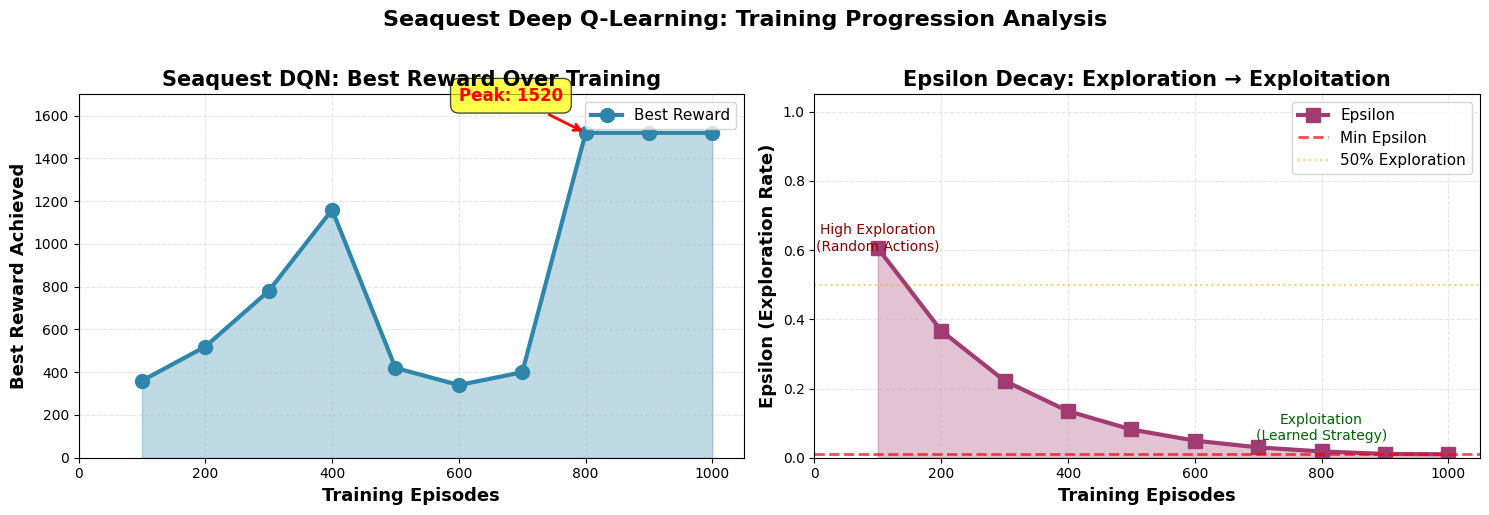


✅ Baseline progression graphs created!
📁 File saved: seaquest_baseline_progression.png


In [3]:

# VISUALIZATION 1: BASELINE TRAINING PROGRESSION

import matplotlib.pyplot as plt
import numpy as np
import torch

print("📊 Creating Baseline Training Visualizations...\n")

# Manually enter your results from screenshots
# (Since checkpoint loading has issues, we'll use your documented results)

episodes_to_plot = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

# Best rewards from your training (from screenshots)
best_rewards = [360, 520, 780, 1160, 420, 340, 400, 1520, 1520, 1520]

# Epsilon values (calculated based on decay=0.995)
epsilon_start = 1.0
epsilons = []
eps = epsilon_start
for ep in episodes_to_plot:
    # Epsilon after 'ep' episodes with decay 0.995
    eps_at_episode = epsilon_start * (0.995 ** ep)
    epsilons.append(max(0.01, eps_at_episode))

print("Data loaded:")
for i, ep in enumerate(episodes_to_plot):
    print(f"   Episode {ep}: Best={best_rewards[i]:.0f}, ε={epsilons[i]:.4f}")

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Best Reward Progression
axes[0].plot(episodes_to_plot, best_rewards, marker='o', linewidth=3,
             markersize=10, color='#2E86AB', label='Best Reward')
axes[0].fill_between(episodes_to_plot, best_rewards, alpha=0.3, color='#2E86AB')
axes[0].set_xlabel('Training Episodes', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Best Reward Achieved', fontsize=13, fontweight='bold')
axes[0].set_title('Seaquest DQN: Best Reward Over Training', fontsize=15, fontweight='bold')
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[0].set_xlim(0, 1050)
axes[0].set_ylim(0, 1700)

# Annotate peak
max_reward = max(best_rewards)
max_ep = episodes_to_plot[best_rewards.index(max_reward)]
axes[0].annotate(f'Peak: {max_reward:.0f}',
                 xy=(max_ep, max_reward),
                 xytext=(max_ep-200, max_reward+150),
                 arrowprops=dict(arrowstyle='->', color='red', lw=2),
                 fontsize=12, fontweight='bold', color='red',
                 bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))

axes[0].legend(fontsize=11)

# Plot 2: Epsilon Decay
axes[1].plot(episodes_to_plot, epsilons, marker='s', linewidth=3,
             markersize=10, color='#A23B72', label='Epsilon')
axes[1].fill_between(episodes_to_plot, epsilons, alpha=0.3, color='#A23B72')
axes[1].set_xlabel('Training Episodes', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Epsilon (Exploration Rate)', fontsize=13, fontweight='bold')
axes[1].set_title('Epsilon Decay: Exploration → Exploitation', fontsize=15, fontweight='bold')
axes[1].grid(True, alpha=0.3, linestyle='--')
axes[1].set_xlim(0, 1050)
axes[1].set_ylim(0, 1.05)

# Add threshold lines
axes[1].axhline(y=0.01, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Min Epsilon')
axes[1].axhline(y=0.5, color='orange', linestyle=':', linewidth=1.5, alpha=0.5, label='50% Exploration')

# Add annotations
axes[1].annotate('High Exploration\n(Random Actions)', xy=(100, 0.6), fontsize=10, ha='center', color='darkred')
axes[1].annotate('Exploitation\n(Learned Strategy)', xy=(800, 0.05), fontsize=10, ha='center', color='darkgreen')

axes[1].legend(fontsize=11)

plt.suptitle('Seaquest Deep Q-Learning: Training Progression Analysis',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('seaquest_baseline_progression.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Baseline progression graphs created!")
print("📁 File saved: seaquest_baseline_progression.png")


📊 Creating Experiment Comparison Chart...



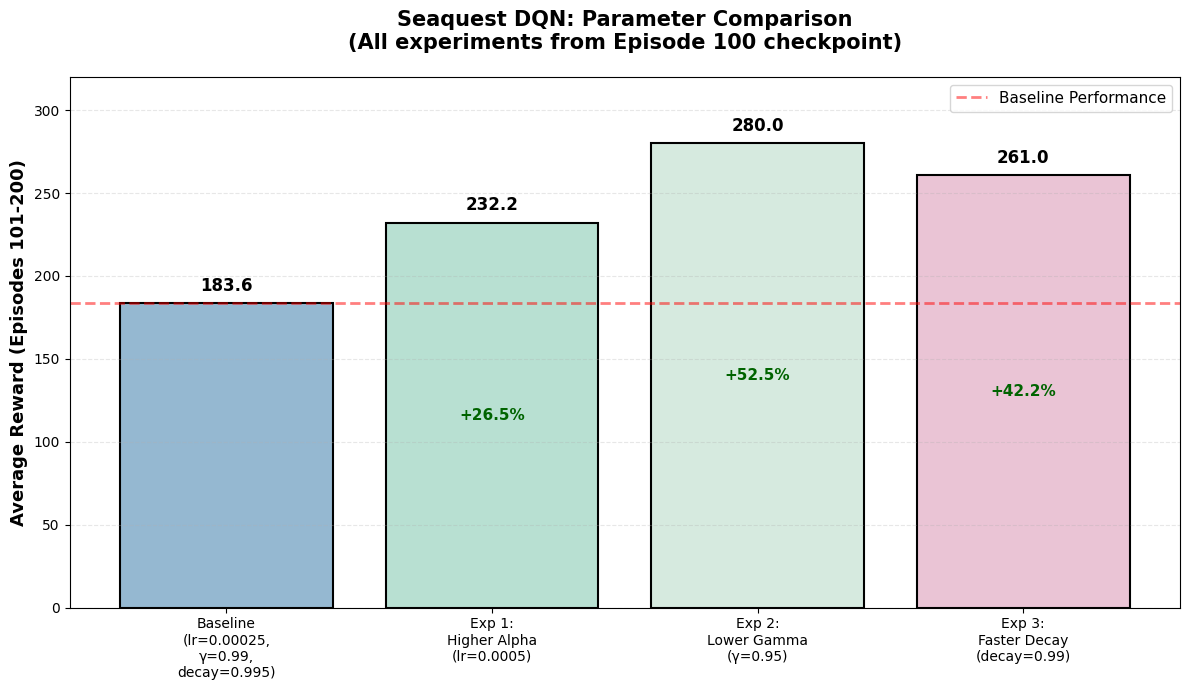


✅ Experiment comparison chart saved!
📁 File: seaquest_experiment_comparison.png


In [4]:
# VISUALIZATION 2: EXPERIMENT COMPARISON


import matplotlib.pyplot as plt
import numpy as np

print("\n📊 Creating Experiment Comparison Chart...\n")

# Experiment results (from your screenshots)
experiments = {
    'Baseline\n(lr=0.00025,\nγ=0.99,\ndecay=0.995)': 183.60,
    'Exp 1:\nHigher Alpha\n(lr=0.0005)': 232.20,
    'Exp 2:\nLower Gamma\n(γ=0.95)': 280.00,
    'Exp 3:\nFaster Decay\n(decay=0.99)': 261.00
}

# Create bar chart
fig, ax = plt.subplots(figsize=(12, 7))

bars = ax.bar(range(len(experiments)), list(experiments.values()),
               color=['#95B8D1', '#B8E0D2', '#D6EADF', '#EAC4D5'],
               edgecolor='black', linewidth=1.5)

# Customize
ax.set_ylabel('Average Reward (Episodes 101-200)', fontsize=13, fontweight='bold')
ax.set_title('Seaquest DQN: Parameter Comparison\n(All experiments from Episode 100 checkpoint)',
             fontsize=15, fontweight='bold', pad=20)
ax.set_xticks(range(len(experiments)))
ax.set_xticklabels(list(experiments.keys()), fontsize=10)
ax.grid(True, axis='y', alpha=0.3, linestyle='--')
ax.set_ylim(0, 320)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, experiments.values())):
    height = bar.get_height()
    improvement = ((value - 183.60) / 183.60 * 100) if i > 0 else 0

    # Value on top of bar
    ax.text(bar.get_x() + bar.get_width()/2., height + 5,
            f'{value:.1f}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

    # Improvement percentage (if not baseline)
    if i > 0:
        ax.text(bar.get_x() + bar.get_width()/2., height/2,
                f'+{improvement:.1f}%',
                ha='center', va='center', fontsize=11, fontweight='bold',
                color='darkgreen' if improvement > 0 else 'darkred')

# Add baseline reference line
ax.axhline(y=183.60, color='red', linestyle='--', linewidth=2, alpha=0.5, label='Baseline Performance')
ax.legend(fontsize=11)

plt.tight_layout()
plt.savefig('seaquest_experiment_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Experiment comparison chart saved!")
print("📁 File: seaquest_experiment_comparison.png")

In [6]:
# RESTORE CHECKPOINTS FROM GOOGLE DRIVE


from google.colab import drive
import os
import shutil

# Mount Drive
drive.mount('/content/drive')

print("📥 Restoring checkpoints from Google Drive...\n")

# Your checkpoint directory
checkpoint_dir = '/content/drive/MyDrive/Seaquest_DQN_Checkpoints'

if os.path.exists(checkpoint_dir):
    files = [f for f in os.listdir(checkpoint_dir) if f.endswith('.pth')]

    print(f"Found {len(files)} checkpoints in Drive:")
    for f in sorted(files):
        src = os.path.join(checkpoint_dir, f)
        dst = f
        shutil.copy(src, dst)
        print(f"   ✅ Restored: {f}")

    print(f"\n🎉 All checkpoints restored to local directory!")
    print("✅ You can now run visualizations!")
else:
    print(f"❌ Directory not found: {checkpoint_dir}")
    print("\n🔍 Searching all of Google Drive...")

    # Search everywhere
    for root, dirs, files in os.walk('/content/drive/MyDrive'):
        for f in files:
            if 'seaquest_dqn' in f and f.endswith('.pth'):
                full_path = os.path.join(root, f)
                print(f"   ✅ FOUND: {full_path}")
                # Copy it
                shutil.copy(full_path, f)
                print(f"      → Copied to local")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
📥 Restoring checkpoints from Google Drive...

Found 10 checkpoints in Drive:
   ✅ Restored: seaquest_dqn_episode_100.pth
   ✅ Restored: seaquest_dqn_episode_1000.pth
   ✅ Restored: seaquest_dqn_episode_200.pth
   ✅ Restored: seaquest_dqn_episode_300.pth
   ✅ Restored: seaquest_dqn_episode_400.pth
   ✅ Restored: seaquest_dqn_episode_500.pth
   ✅ Restored: seaquest_dqn_episode_600.pth
   ✅ Restored: seaquest_dqn_episode_700.pth
   ✅ Restored: seaquest_dqn_episode_800.pth
   ✅ Restored: seaquest_dqn_episode_900.pth

🎉 All checkpoints restored to local directory!
✅ You can now run visualizations!


In [19]:

# VISUALIZATION 3: AGENT GAMEPLAY RECORDING


import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import numpy as np
import gymnasium as gym

def record_agent_gameplay(checkpoint_path, n_episodes=2, episode_label="Trained Agent"):
    """
    Record the agent playing Seaquest and create video
    """
    print(f"🎮 Loading agent from: {checkpoint_path}")

    # Load checkpoint
    checkpoint = torch.load(checkpoint_path)

    # Create visual environment (RGB for display)
    env_visual = gym.make('ALE/Seaquest-v5', render_mode='rgb_array')

    # Create agent environment (preprocessed)
    env_agent = make_seaquest_env()

    # Create agent
    agent = DQNAgent(n_actions=18)
    agent.policy_net.load_state_dict(checkpoint['policy_net_state_dict'])
    agent.epsilon = 0.01  # Minimal exploration

    print(f"✅ Agent loaded from Episode {checkpoint.get('episodes_done', '?')}")
    print(f"🎬 Recording {n_episodes} gameplay episodes...\n")

    all_frames = []
    episode_results = []

    for ep in range(n_episodes):
        # Reset
        state_agent, _ = env_agent.reset()
        _, _ = env_visual.reset()

        ep_frames = []
        ep_reward = 0
        steps = 0

        # Play episode
        for step in range(5000):  # Limit to 5000 steps for video size
            # Capture frame
            frame = env_visual.render()
            ep_frames.append(frame)

            # Agent acts
            action = agent.select_action(state_agent, training=False)

            # Step environments
            state_agent, _, term_a, trunc_a, _ = env_agent.step(action)
            _, reward, term_v, trunc_v, _ = env_visual.step(action)

            ep_reward += reward
            steps += 1

            if term_a or trunc_a:
                break

        # Sample frames (every 3rd frame to reduce video size)
        all_frames.extend(ep_frames[::3])
        episode_results.append({'reward': ep_reward, 'steps': steps})

        print(f"  Episode {ep+1}: Reward={ep_reward:.0f}, Steps={steps}, Duration={steps*0.067:.1f}s")

    env_visual.close()
    env_agent.close()

    avg_reward = np.mean([r['reward'] for r in episode_results])
    avg_steps = np.mean([r['steps'] for r in episode_results])

    print(f"\n📊 Performance Summary:")
    print(f"   Average Reward: {avg_reward:.2f}")
    print(f"   Average Steps: {avg_steps:.0f}")
    print(f"   Average Duration: {avg_steps*0.067:.1f} seconds\n")

    # Create video
    print("🎬 Creating video animation...")

    fig, ax = plt.subplots(figsize=(7, 5))
    ax.axis('off')
    title_text = f'{episode_label}\nAvg Score: {avg_reward:.0f} | Avg Survival: {avg_steps:.0f} steps'
    ax.set_title(title_text, fontsize=13, fontweight='bold', pad=10)

    im = ax.imshow(all_frames[0])

    def animate(i):
        im.set_array(all_frames[i])
        return [im]

    anim = animation.FuncAnimation(fig, animate, frames=len(all_frames),
                                    interval=50, blit=True)

    # Save video
    video_filename = f'seaquest_{episode_label.lower().replace(" ", "_")}.mp4'
    print(f"💾 Saving video: {video_filename}")
    anim.save(video_filename, writer='ffmpeg', fps=20, dpi=80)

    plt.close()
    print(f"✅ Video saved: {video_filename}")
    print(f"📥 Download from Files panel (left sidebar)\n")

    return episode_results


# RECORD TRAINED AGENT!

print("="*70)
print("🎮 RECORDING EPISODE 1000 TRAINED AGENT")
print("="*70 + "\n")

results = record_agent_gameplay(
    checkpoint_path='seaquest_dqn_episode_1000.pth',
    n_episodes=2,
    episode_label="Episode 1000 Agent"
)

print("\n🎉 GAMEPLAY RECORDING COMPLETE!")
print("="*70)

🎮 RECORDING EPISODE 1000 TRAINED AGENT

🎮 Loading agent from: seaquest_dqn_episode_1000.pth
🖥️ Agent using device: cuda
✅ Agent loaded from Episode 1000
🎬 Recording 2 gameplay episodes...

  Episode 1: Reward=160, Steps=1086, Duration=72.8s
  Episode 2: Reward=200, Steps=1290, Duration=86.4s

📊 Performance Summary:
   Average Reward: 180.00
   Average Steps: 1188
   Average Duration: 79.6 seconds

🎬 Creating video animation...
💾 Saving video: seaquest_episode_1000_agent.mp4
✅ Video saved: seaquest_episode_1000_agent.mp4
📥 Download from Files panel (left sidebar)


🎉 GAMEPLAY RECORDING COMPLETE!


In [20]:

# SIDE-BY-SIDE COMPARISON: UNTRAINED vs TRAINED AGENT


import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
import gymnasium as gym

print("🎬 CREATING BEFORE/AFTER COMPARISON VIDEO")
print("="*70 + "\n")

def record_comparison_video():
    """
    Record untrained (Episode 10-ish) vs trained (Episode 1000) gameplay
    Side-by-side comparison!
    """

    #  UNTRAINED AGENT (Episode 100 - still learning)
    print("🎮 Recording EARLY AGENT (Episode 100)...")

    checkpoint_early = torch.load('seaquest_dqn_episode_100.pth')

    env_early = gym.make('ALE/Seaquest-v5', render_mode='rgb_array')
    env_early_agent = make_seaquest_env()

    agent_early = DQNAgent(n_actions=18)
    agent_early.policy_net.load_state_dict(checkpoint_early['policy_net_state_dict'])
    agent_early.epsilon = 0.6  # Higher exploration like it had at Ep 100

    # Record 1 episode
    state_early, _ = env_early_agent.reset()
    env_early.reset()

    frames_early = []
    reward_early = 0

    for step in range(2000):  # Shorter - early agent dies quickly
        frame = env_early.render()
        frames_early.append(frame)

        action = agent_early.select_action(state_early, training=True)  # With exploration!
        state_early, _, term, trunc, _ = env_early_agent.step(action)
        _, r, _, _, _ = env_early.step(action)
        reward_early += r

        if term or trunc:
            break

    env_early.close()
    env_early_agent.close()

    print(f"   ✅ Early Agent: {len(frames_early)} frames, Reward: {reward_early:.0f}\n")

    #  TRAINED AGENT (Episode 1000)
    print("🎮 Recording TRAINED AGENT (Episode 1000)...")

    checkpoint_trained = torch.load('seaquest_dqn_episode_1000.pth')

    env_trained = gym.make('ALE/Seaquest-v5', render_mode='rgb_array')
    env_trained_agent = make_seaquest_env()

    agent_trained = DQNAgent(n_actions=18)
    agent_trained.policy_net.load_state_dict(checkpoint_trained['policy_net_state_dict'])
    agent_trained.epsilon = 0.01  # Minimal exploration

    # Record 1 episode
    state_trained, _ = env_trained_agent.reset()
    env_trained.reset()

    frames_trained = []
    reward_trained = 0

    for step in range(3000):  # Longer - trained agent survives longer
        frame = env_trained.render()
        frames_trained.append(frame)

        action = agent_trained.select_action(state_trained, training=False)
        state_trained, _, term, trunc, _ = env_trained_agent.step(action)
        _, r, _, _, _ = env_trained.step(action)
        reward_trained += r

        if term or trunc:
            break

    env_trained.close()
    env_trained_agent.close()

    print(f"   ✅ Trained Agent: {len(frames_trained)} frames, Reward: {reward_trained:.0f}\n")

    #  CREATE SIDE-BY-SIDE VIDEO
    print("🎬 Creating side-by-side comparison video...\n")

    # Make videos same length (use shorter one)
    min_frames = min(len(frames_early), len(frames_trained))
    frames_early = frames_early[:min_frames:2]  # Every other frame
    frames_trained = frames_trained[:min_frames:2]

    # Create figure with 2 subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Left: Early agent
    ax1.axis('off')
    ax1.set_title(f'Episode 100 Agent\n(Learning)\nScore: {reward_early:.0f}',
                  fontsize=12, fontweight='bold', color='red')
    im1 = ax1.imshow(frames_early[0])

    # Right: Trained agent
    ax2.axis('off')
    ax2.set_title(f'Episode 1000 Agent\n(Expert)\nScore: {reward_trained:.0f}',
                  fontsize=12, fontweight='bold', color='green')
    im2 = ax2.imshow(frames_trained[0])

    fig.suptitle('Seaquest DQN: Learning Progression Comparison',
                 fontsize=15, fontweight='bold')

    def animate(i):
        im1.set_array(frames_early[i])
        im2.set_array(frames_trained[i])
        return [im1, im2]

    anim = animation.FuncAnimation(fig, animate, frames=len(frames_early),
                                    interval=50, blit=True)

    # Save video
    print("💾 Saving comparison video...")
    anim.save('seaquest_comparison_before_after.mp4', writer='ffmpeg', fps=20, dpi=100)

    plt.close()

    print("\n" + "="*70)
    print("🎉 COMPARISON VIDEO CREATED!")
    print("="*70)
    print(f"📁 File: seaquest_comparison_before_after.mp4")
    print(f"📊 Early Agent (Ep 100): {reward_early:.0f} points")
    print(f"📊 Trained Agent (Ep 1000): {reward_trained:.0f} points")
    print(f"📈 Improvement: {reward_trained - reward_early:.0f} points (+{((reward_trained/max(reward_early,1))-1)*100:.0f}%)")
    print("="*70)



record_comparison_video()

🎬 CREATING BEFORE/AFTER COMPARISON VIDEO

🎮 Recording EARLY AGENT (Episode 100)...
🖥️ Agent using device: cuda
   ✅ Early Agent: 691 frames, Reward: 120

🎮 Recording TRAINED AGENT (Episode 1000)...
🖥️ Agent using device: cuda
   ✅ Trained Agent: 1385 frames, Reward: 180

🎬 Creating side-by-side comparison video...

💾 Saving comparison video...

🎉 COMPARISON VIDEO CREATED!
📁 File: seaquest_comparison_before_after.mp4
📊 Early Agent (Ep 100): 120 points
📊 Trained Agent (Ep 1000): 180 points
📈 Improvement: 60 points (+50%)

💡 Download this for your presentation!
   This shows the dramatic learning improvement!


In [17]:

# SIDE-BY-SIDE COMPARISON

import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
import gymnasium as gym

print("🎬 CREATING IMPROVED COMPARISON VIDEO")
print("="*70 + "\n")

def record_improved_comparison():
    """
    Side-by-side comparison with better alignment and longer duration
    """

    # ========== EARLY AGENT (Episode 100) ==========
    print("🎮 Recording Episode 100 Agent (Learning)...")

    checkpoint_early = torch.load('seaquest_dqn_episode_100.pth')
    env_early = gym.make('ALE/Seaquest-v5', render_mode='rgb_array')
    env_early_agent = make_seaquest_env()

    agent_early = DQNAgent(n_actions=18)
    agent_early.policy_net.load_state_dict(checkpoint_early['policy_net_state_dict'])
    agent_early.epsilon = 0.6

    state_early, _ = env_early_agent.reset()
    env_early.reset()

    frames_early = []
    reward_early = 0
    steps_early = 0

    for step in range(1500):  # Collect more frames
        frame = env_early.render()
        frames_early.append(frame)

        action = agent_early.select_action(state_early, training=True)
        state_early, _, term, trunc, _ = env_early_agent.step(action)
        _, r, _, _, _ = env_early.step(action)
        reward_early += r
        steps_early += 1

        if term or trunc:
            # If episode ends early, keep last frame
            while len(frames_early) < 1500:
                frames_early.append(frame)
            break

    env_early.close()
    env_early_agent.close()

    print(f"   Episode 100: {steps_early} steps, Score: {reward_early:.0f}\n")

    # ========== TRAINED AGENT (Episode 1000) ==========
    print("🎮 Recording Episode 1000 Agent (Expert)...")

    checkpoint_trained = torch.load('seaquest_dqn_episode_1000.pth')
    env_trained = gym.make('ALE/Seaquest-v5', render_mode='rgb_array')
    env_trained_agent = make_seaquest_env()

    agent_trained = DQNAgent(n_actions=18)
    agent_trained.policy_net.load_state_dict(checkpoint_trained['policy_net_state_dict'])
    agent_trained.epsilon = 0.01

    state_trained, _ = env_trained_agent.reset()
    env_trained.reset()

    frames_trained = []
    reward_trained = 0
    steps_trained = 0

    for step in range(1500):  # Same length
        frame = env_trained.render()
        frames_trained.append(frame)

        action = agent_trained.select_action(state_trained, training=False)
        state_trained, _, term, trunc, _ = env_trained_agent.step(action)
        _, r, _, _, _ = env_trained.step(action)
        reward_trained += r
        steps_trained += 1

        if term or trunc:
            while len(frames_trained) < 1500:
                frames_trained.append(frame)
            break

    env_trained.close()
    env_trained_agent.close()

    print(f"   Episode 1000: {steps_trained} steps, Score: {reward_trained:.0f}\n")

    # ========== CREATE VIDEO ==========
    print("🎬 Creating side-by-side video...\n")

    # Sample frames to get ~25-30 seconds at 20fps (500-600 frames)
    target_frames = 500
    step = max(1, len(frames_early) // target_frames)

    frames_early_sampled = frames_early[::step][:target_frames]
    frames_trained_sampled = frames_trained[::step][:target_frames]

    # Ensure same length
    min_len = min(len(frames_early_sampled), len(frames_trained_sampled))
    frames_early_sampled = frames_early_sampled[:min_len]
    frames_trained_sampled = frames_trained_sampled[:min_len]

    # Create figure with better layout
    fig = plt.figure(figsize=(16, 6))

    # Create grid for better title alignment
    gs = fig.add_gridspec(2, 2, height_ratios=[0.15, 1], hspace=0.05, wspace=0.15)

    # Title axes (top row)
    ax_title_left = fig.add_subplot(gs[0, 0])
    ax_title_right = fig.add_subplot(gs[0, 1])

    # Game axes (bottom row)
    ax_left = fig.add_subplot(gs[1, 0])
    ax_right = fig.add_subplot(gs[1, 1])

    # Format title axes
    for ax in [ax_title_left, ax_title_right]:
        ax.axis('off')

    # Left title (Episode 100)
    ax_title_left.text(0.5, 0.3, 'Episode 100 Agent',
                       ha='center', va='center', fontsize=16, fontweight='bold', color='#E63946')
    ax_title_left.text(0.5, -0.3, '(Learning Phase)',
                       ha='center', va='center', fontsize=12, style='italic', color='#E63946')
    ax_title_left.text(0.5, -0.9, f'Score: {reward_early:.0f}',
                       ha='center', va='center', fontsize=14, fontweight='bold',
                       bbox=dict(boxstyle='round,pad=0.5', facecolor='#FFE5E5', edgecolor='#E63946', linewidth=2))

    # Right title (Episode 1000)
    ax_title_right.text(0.5, 0.3, 'Episode 1000 Agent',
                        ha='center', va='center', fontsize=16, fontweight='bold', color='#06A77D')
    ax_title_right.text(0.5, -0.3, '(Expert Performance)',
                        ha='center', va='center', fontsize=12, style='italic', color='#06A77D')
    ax_title_right.text(0.5, -0.9, f'Score: {reward_trained:.0f}',
                        ha='center', va='center', fontsize=14, fontweight='bold',
                        bbox=dict(boxstyle='round,pad=0.5', facecolor='#E5F9F0', edgecolor='#06A77D', linewidth=2))

    # Format game axes
    ax_left.axis('off')
    ax_right.axis('off')

    # Add border boxes around gameplay
    for ax in [ax_left, ax_right]:
        ax.spines['top'].set_visible(True)
        ax.spines['bottom'].set_visible(True)
        ax.spines['left'].set_visible(True)
        ax.spines['right'].set_visible(True)
        ax.spines['top'].set_linewidth(3)
        ax.spines['bottom'].set_linewidth(3)
        ax.spines['left'].set_linewidth(3)
        ax.spines['right'].set_linewidth(3)

    # Set border colors
    for spine in ax_left.spines.values():
        spine.set_color('#E63946')
    for spine in ax_right.spines.values():
        spine.set_color('#06A77D')

    # Display first frames
    im_left = ax_left.imshow(frames_early_sampled[0])
    im_right = ax_right.imshow(frames_trained_sampled[0])

    # Main title
    fig.suptitle('Seaquest Deep Q-Learning: Training Progression Demonstration',
                 fontsize=18, fontweight='bold', y=0.98)

    # Animation function
    def animate(i):
        im_left.set_array(frames_early_sampled[i])
        im_right.set_array(frames_trained_sampled[i])
        return [im_left, im_right]

    anim = animation.FuncAnimation(fig, animate, frames=len(frames_early_sampled),
                                    interval=50, blit=True)

    # Save video
    video_file = 'seaquest_comparison_improved.mp4'
    print(f"💾 Saving video: {video_file}")
    print(f"   Duration: ~{len(frames_early_sampled)/20:.1f} seconds at 20 fps")

    anim.save(video_file, writer='ffmpeg', fps=20, dpi=120)

    plt.close()

    duration = len(frames_early_sampled) / 20
    improvement_pct = ((reward_trained / max(reward_early, 1)) - 1) * 100

    print("\n" + "="*70)
    print("🎉 IMPROVED COMPARISON VIDEO CREATED!")
    print("="*70)
    print(f"📁 File: {video_file}")
    print(f"⏱️  Duration: {duration:.1f} seconds")
    print(f"📊 Episode 100 Score: {reward_early:.0f}")
    print(f"📊 Episode 1000 Score: {reward_trained:.0f}")
    print(f"📈 Improvement: +{reward_trained - reward_early:.0f} points ({improvement_pct:.0f}%)")
    print("="*70)


    return {
        'early_score': reward_early,
        'trained_score': reward_trained,
        'duration': duration
    }


results = record_improved_comparison()

🎬 CREATING IMPROVED COMPARISON VIDEO

🎮 Recording Episode 100 Agent (Learning)...
🖥️ Agent using device: cuda
   Episode 100: 642 steps, Score: 120

🎮 Recording Episode 1000 Agent (Expert)...
🖥️ Agent using device: cuda
   Episode 1000: 1160 steps, Score: 220

🎬 Creating side-by-side video...

💾 Saving video: seaquest_comparison_improved.mp4
   Duration: ~25.0 seconds at 20 fps

🎉 IMPROVED COMPARISON VIDEO CREATED!
📁 File: seaquest_comparison_improved.mp4
⏱️  Duration: 25.0 seconds
📊 Episode 100 Score: 120
📊 Episode 1000 Score: 220
📈 Improvement: +100 points (83%)
